In [1]:
from commonfunctions import *
import joblib
%matplotlib inline
%load_ext autoreload
%autoreload 2

<ipython-input-2-f70465ae7e46>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))


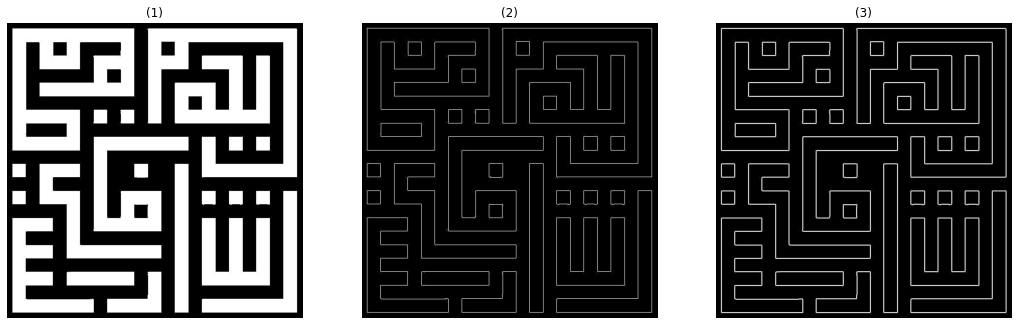

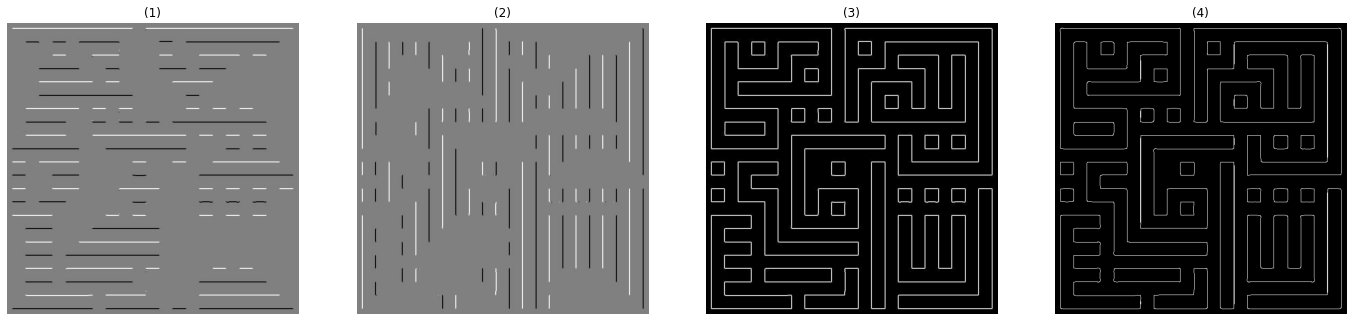

In [2]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))
img_roberts = roberts(img)
img_perwitt = prewitt(img)
img_sobel_h = sobel_h(img)
img_sobel_v = sobel_v(img)
img_sobel = sobel(img)
img_canny = canny(img)
show_images([img,img_roberts,img_perwitt])
show_images([img_sobel_h,img_sobel_v,img_sobel,img_canny])

In [4]:
!pip install opencv-python

^C


In [5]:
import cv2
hog = cv2.HOGDescriptor()
im = cv2.imread('ACdata_base/9/1496.jpg')
h = hog.compute(im)
print(hog)

<HOGDescriptor 0000026C90F3BC90>


In [2]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

img = cv2.imread('ACdata_base/9/1496.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
#print(lines)

HV = 0;
Total = 0
for line in lines:
    if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
        HV+=1;
    Total +=1

HVSL = Total - HV

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [313]:
def HVSL(gray):    
    edges = cv2.Canny(gray,50,150,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/180,80)
    print(lines)
    if (lines is None): 
        return -1 
    HV = 0;
    Total = 0
    for line in lines:
        if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
            HV+=1;
        Total +=1

    return HV/Total
def HPP(binary_image):
    #de beta5od binary image w betraga3 histogram bey3ed fe kol line fe kam pizel 1 w da bey3abar 3an 2el base line
    x=np.sum(binary_image, axis = 1)
    x=x/np.max(x)
    return x
def pre_process(x):
    #bet7awel le binary
    if x[0][0][0]>128:
        return (x<128).astype(int)
    else:
        return (x>128).astype(int)
def get_histogram_of_gradients(img):
    img=np.float32(img) / 255.0
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    _, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    hist=np.histogram(angle)[0]
    print(hist)
    return hist/hist.max()
    

In [270]:
print(img.shape)
HVSL(img)

(599, 600, 3)
[[[588.          0.       ]]

 [[ 11.          1.5707964]]

 [[587.          1.5707964]]

 [[ 11.          0.       ]]

 [[559.          0.       ]]

 [[367.          0.       ]]

 [[339.          0.       ]]

 [[203.          1.5707964]]

 [[ 38.          1.5707964]]

 [[230.          1.5707964]]

 [[259.          1.5707964]]

 [[532.          0.       ]]

 [[532.          1.5707964]]

 [[395.          0.       ]]

 [[312.          0.       ]]

 [[175.          0.       ]]

 [[286.          1.5707964]]

 [[285.          0.       ]]

 [[477.          0.       ]]

 [[312.          1.5707964]]

 [[148.          0.       ]]

 [[504.          0.       ]]

 [[505.          1.5707964]]

 [[478.          1.5707964]]

 [[450.          0.       ]]

 [[559.          1.5707964]]

 [[423.          0.       ]]

 [[258.          0.       ]]

 [[175.          1.5707964]]

 [[340.          1.5707964]]

 [[148.          1.5707964]]

 [[451.          1.5707964]]

 [[203.          0.       

0.9787234042553191

In [271]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = 9

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('ACdata_base',
                                    target_size=(500, 500),
                                    batch_size=73139,
                                    class_mode='sparse',
                                   color_mode='grayscale',
                                    shuffle=True,
    seed=42 )
X , y = data.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11);
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=11);
X_train.shape

Found 1685 images belonging to 9 classes.


(1348, 500, 500, 1)

In [ ]:
pre_processed_train=[pre_process(patch) for patch in X_train] # de bet7awel 2el training set le binary fa law feature sha8ala 3ala binary hanesta5dem da

In [272]:
#X_train_gray = rgb2gray(X_train)
print(X_train.shape)

(1348, 500, 500, 1)


In [273]:
#X_train_gray = rgb2gray(X_train)
print(X_train.shape)

(1348, 500, 500, 1)


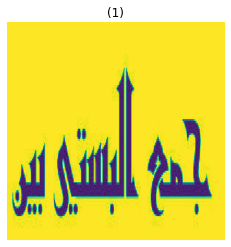

[255.]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


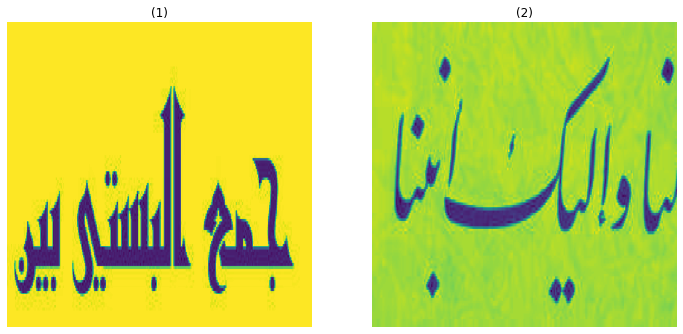

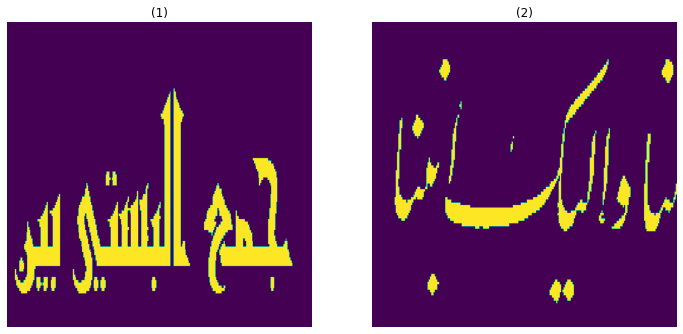

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [274]:
show_images([X_train[1]])
print(X_train[1][0][0])
print(pre_process(X_train[1]))
show_images([X_train[1],X_train[0]])
show_images([pre_process(X_train[1]),pre_process(X_train[0])]) 
print(pre_process(X_train[1]))

In [314]:

values = []
for gray in X_train:
    print(gray.shape)
    values.append(HVSL(np.uint8(gray)))
    
    

(500, 500, 1)
[[[3.0300000e+02 1.5707964e+00]]

 [[4.5400000e+02 0.0000000e+00]]

 [[2.9500000e+02 1.5707964e+00]]

 [[2.8300000e+02 1.6231562e+00]]

 [[2.9100000e+02 1.6231562e+00]]

 [[4.7000000e+01 0.0000000e+00]]

 [[2.9900000e+02 1.5707964e+00]]

 [[3.0800000e+02 1.5707964e+00]]

 [[3.3800000e+02 1.5707964e+00]]

 [[3.3400000e+02 1.5707964e+00]]

 [[3.2700000e+02 6.9813170e-02]]

 [[3.8800000e+02 1.3962634e-01]]

 [[3.9100000e+02 1.5707964e-01]]

 [[4.4000000e+01 0.0000000e+00]]

 [[3.0900000e+02 0.0000000e+00]]

 [[2.8600000e+02 1.6231562e+00]]

 [[4.5100000e+02 0.0000000e+00]]

 [[5.2000000e+01 5.2359879e-02]]

 [[2.7600000e+02 1.7104226e+00]]

 [[3.0700000e+02 1.5533431e+00]]

 [[2.9000000e+02 1.5707964e+00]]

 [[2.8800000e+02 1.6231562e+00]]

 [[3.0800000e+02 1.5184364e+00]]

 [[2.8200000e+02 1.6580628e+00]]]
(500, 500, 1)
[[[ 273.           0.       ]]

 [[ 404.           1.5707964]]

 [[ 399.           1.5707964]]

 [[ 268.           0.       ]]

 [[ 257.           0.       

 [[-129.           3.1241393]]]
(500, 500, 1)
[[[ 4.9000000e+02  0.0000000e+00]]

 [[ 6.0000000e+00  1.5707964e+00]]

 [[ 6.0000000e+00  0.0000000e+00]]

 [[ 4.9000000e+02  1.5707964e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 4.7500000e+02  1.5707964e+00]]

 [[ 2.0000000e+01  1.5707964e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 4.6100000e+02  1.5707964e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  1.5707964e+00]]

 [[ 1.5200000e+02  1.5707964e+00]]

 [[ 1.8200000e+02  1.5707964e+00]]

 [[ 1.6600000e+02  1.5707964e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 3.4000000e+01  1.5707964e+00]]

 [[ 4.4600000e+02  1.5707964e+00]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 1.9600000e+02  1.5707964e+00]]

 [[ 1.2200000e+02  1.5707964e+00]]

 [[ 5.0000000e+01  0.0000000e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 3.2800000e+02 

 [[-149.           3.106686 ]]]
(500, 500, 1)
[[[ 3.6800000e+02  1.5707964e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 2.0700000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  1.5533431e+00]]

 [[ 3.6000000e+02  1.5882496e+00]]

 [[ 3.8900000e+02  1.7453292e-02]]

 [[ 9.8000000e+01  1.7453292e-02]]

 [[ 2.0900000e+02  0.0000000e+00]]

 [[-9.2000000e+01  3.1241393e+00]]

 [[ 2.8300000e+02  1.5882496e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 3.1100000e+02  1.5882496e+00]]

 [[ 3.6600000e+02  1.5533431e+00]]

 [[-3.8100000e+02  3.1241393e+00]]

 [[ 2.9100000e+02  1.5533431e+00]]

 [[ 3.2500000e+02 

 [[-4.2500000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 2.6000000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 2.9500000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  0.0000000e+00]]

 [[ 2.3400000e+02  1.5707964e+00]]

 [[-2.5200000e+02  3.1241393e+00]]

 [[ 2.3400000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 2.6100000e+02  3.6651915e-01]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  3.3161256e-01]]

 [[ 1.4700000e+02  1.5707964e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 1.8400000e+02  1.5707964e+00]]

 [[ 4.9000000e

 [[-6.8000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 5.6000000e+01  0.0000000e+00]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[-5.2000000e+01  3.1241393e+00]]

 [[ 4.7000000e+02  1.0471976e-01]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  1.7453292e-02]]

 [[ 4.7200000e+02  1.2217305e-01]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[ 4.7000000e+02  5.2359879e-02]]

 [[ 2.0000000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  3.4906585e-02]]

 [[ 1.8600000e+02  1.9198622e-01]]

 [[ 2.0400000e+02  3.4906585e-02]]

 [[ 1.5300000e+02  1.0471976e-01]]

 [[ 6.3000000e+01  1.7453292e-02]]

 [[-4.5900000e+02  3.0717795e+00]]

 [[-4.7100000e+02  3.1241393e+00]]

 [[ 1.5900000e+02  1.2217305e-01]]

 [[ 1.6900000e+02  1.3962634e-01]]

 [[ 3.0300000e+02  1.9198622e-01]]

 [[-4.5800000e+02  3.1241393e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  6.9813170e-02]]

 [[-4.5200000e+02  3.1066861e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  1.9198622e-01]]

 [[ 4.7800000e

 [[-6.6000000e+01  2.3561945e+00]]]
(500, 500, 1)
[[[ 2.2500000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[-2.5300000e+02  3.1066861e+00]]

 [[-2.6200000e+02  3.1241393e+00]]

 [[ 2.2100000e+02  0.0000000e+00]]

 [[ 1.2900000e+02  1.7453292e-02]]

 [[-2.1500000e+02  3.1066861e+00]]

 [[ 4.5000000e+02  1.5707964e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[-2.5700000e+02  3.1241393e+00]]

 [[ 2.6700000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[-2.5000000e+02  3.0892327e+00]]

 [[-1.1500000e+02  3.1241393e+00]]

 [[-1.6400000e+02  3.1066861e+00]]

 [[-2.1000000e+02  3.0543261e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[-1.1000000e+02  3.1066861e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 1.1400000e+02  1.7453292e-02]]

 [[-2.0300000e+02  3.0368729e+00]]

 [[-2.1700000e+02  3.1241393e+00]]

 [[-9.6000000e+01  3.1066861e+00]]

 [[-1.1900000e+02  3.1241393e+00]]

 [[ 1.7600000e

[[[ 3.9400000e+02  0.0000000e+00]]

 [[ 1.1900000e+02  1.7453292e-02]]

 [[-1.3800000e+02  3.1241393e+00]]

 [[ 3.3900000e+02  1.0471976e-01]]

 [[-1.9100000e+02  2.9845130e+00]]

 [[-1.3200000e+02  3.1066861e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.4300000e+02  1.0471976e-01]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[-3.8800000e+02  3.1066861e+00]]

 [[-1.2500000e+02  3.0717795e+00]]

 [[ 9.2000000e+01  2.2689280e-01]]

 [[ 3.9300000e+02  5.0614548e-01]]

 [[ 8.5000000e+01  2.4434610e-01]]

 [[-3.9100000e+02  3.1241393e+00]]

 [[ 3.3700000e+02  8.7266460e-02]]]
(500, 500, 1)
[[[-207.           3.1241393]]

 [[ 217.           0.       ]]

 [[ 366.           0.       ]]

 ...

 [[-314.           3.0892327]]

 [[-127.           3.106686 ]]

 [[ -41.           3.106686 ]]]
(500, 500, 1)
[[[282.          1.5707964]]

 [[275.          1.5707964]]

 [[336.          0.       ]]

 [[242.          1.5707964]]

 [[249.          1.5707964]]

 [[333.     

 [[ 4.2000000e+01  2.3561945e+00]]]
(500, 500, 1)
[[[-4.8800000e+02  3.1241393e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[-7.7000000e+01  3.1241393e+00]]

 [[ 0.0000000e+00  3.1241393e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[-4.9100000e+02  3.1241393e+00]]

 [[-1.3100000e+02  3.1066861e+00]]

 [[-2.7500000e+02  3.1066861e+00]]

 [[-2.4400000e+02  3.1241393e+00]]

 [[ 4.9500000e+02  0.0000000e+00]]

 [[-2.7800000e+02  3.1066861e+00]]

 [[-3.5300000e+02  3.1066861e+00]]

 [[-3.5900000e+02  3.1241393e+00]]

 [[-3.5600000e+02  3.1241393e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[-2.4000000e+02  3.1066861e+00]]

 [[-3.0500000e+02  3.1066861e+00]]

 [[-2.4700000e+02  3.1241393e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  8.7266460e-02]]

 [[ 1.4200000e+02  1.7453292e-02]]

 [[ 8.6000000e+01  0.0000000e+00]]

 [[ 3.3500000e+02  4.3633232e-01]]

 [[-2.0000000e+00  2.9321532e+00]]

 [[-4.7200000e+02  3.1066861e+00]]

 [[-3.0900000e

 [[-1.9400000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.4800000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[-3.5300000e+02  3.1066861e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 2.2500000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  3.6651915e-01]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[-3.4100000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 3.5500000e+02  1.5707964e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 3.4800000e+02  1.5707964e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]



(500, 500, 1)
[[[  74.           0.       ]]

 [[ 335.           0.       ]]

 [[ 337.           1.5707964]]

 ...

 [[-118.           3.0892327]]

 [[-327.           3.106686 ]]

 [[-266.           3.1241393]]]
(500, 500, 1)
[[[ 3.8900000e+02  1.5707964e+00]]

 [[ 3.8600000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  1.5533431e+00]]

 [[ 3.8200000e+02  1.5882496e+00]]

 [[ 8.2000000e+01  1.7453292e-02]]

 [[ 1.6900000e+02  1.7453292e-02]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[-1.3000000e+02 

 [[-1.6000000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.5000000e+01  1.7453292e-02]]

 [[ 3.7500000e+02  3.4906585e-02]]

 [[ 3.8000000e+01  5.2359879e-02]]

 ...

 [[-3.4500000e+02  3.0194197e+00]]

 [[-2.2000000e+02  3.0194197e+00]]

 [[-2.6900000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 211.           0.       ]]

 [[ 112.           0.       ]]

 [[ 156.           0.       ]]

 ...

 [[  -2.           3.054326 ]]

 [[-450.           3.106686 ]]

 [[ -83.           3.1241393]]]
(500, 500, 1)
[[[ 437.           0.       ]]

 [[ 417.           0.       ]]

 [[ 339.           0.       ]]

 ...

 [[-274.           2.9670596]]

 [[-186.           3.1241393]]

 [[ -91.           3.1241393]]]
(500, 500, 1)
[[[ 339.           0.7853982]]

 [[-216.           3.0892327]]

 [[ 325.           0.7853982]]

 ...

 [[ -27.           3.0892327]]

 [[-357.           3.106686 ]]

 [[-232.           3.106686 ]]]
(500, 500, 1)
[[[ 2.2600000e+02  8.7266460e-02]]

 [[ 2.3200000e+02  1.0471976e-01]]

 [[ 3.

 [[-5.1000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.1700000e+02  2.4434610e-01]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 3.2200000e+02  2.6179940e-01]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  0.0000000e+00]]

 [[ 3.5100000e+02  1.5707964e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 1.0900000e+02  3.3161256e-01]]

 [[ 2.6600000e+02  1.6057029e+00]]

 [[ 1.1200000e+02  3.4906584e-01]]

 [[ 8.8000000e+01  1.7453292e-02]]

 [[ 3.1500000e+02  2.0943952e-01]]

 [[ 2.3200000e+02  1.7104226e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  2.7925268e-01]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  3.1415927e-01]]

 [[ 1.1300000e+02  3.6651915e-01]]

 [[ 6.1000000e+01  0.0000000e+00]]

 [[ 3.1300000e+02  2.2689280e-01]]

 [[ 2.5800000e

 [[ 337.           1.4835298]]]
(500, 500, 1)
[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5882496e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5533431e+00]]

 [[ 1.9600000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  1.5184364e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.2900000e+02  1.4486233e+00]]

 [[ 3.1600000e+02  1.5533431e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.4311700e+00]]

 [[ 2.7000000e+02  1.6231562e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.6406095e+00]]

 [[ 2.6600000e+02  1.6406095e+00]]

 [[ 3.2300000e+02 

 [[-1.9200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.8100000e+02  1.5707964e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 4.3500000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  1.7453292e-02]]

 [[ 3.4400000e+02  1.5533431e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.7400000e+02  1.5882496e+00]]

 [[ 3.8200000e+02  1.5533431e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  1.7453292e-02]]

 [[ 1.2900000e+02  2.4434610e-01]]

 [[ 2.7200000e+02  1.7453292e-02]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[-3.9000000e

 [[-4.0000000e+00  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.5400000e+02  3.4906585e-02]]

 [[ 3.2900000e+02  3.4906585e-02]]

 [[ 2.2000000e+02  1.5707964e-01]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  6.9813170e-02]]

 [[ 2.1600000e+02  1.3962634e-01]]

 [[ 3.5900000e+02  3.4906585e-02]]

 [[ 2.0500000e+02  8.7266460e-02]]

 [[ 2.1300000e+02  1.3962634e-01]]

 [[ 2.0300000e+02  1.0471976e-01]]

 [[ 4.7700000e+02  1.7453292e-02]]

 [[ 3.3700000e+02  5.2359879e-02]]

 [[ 1.9700000e+02  5.2359879e-02]]

 [[ 2.6300000e+02  8.7266460e-02]]

 [[ 4.8800000e+02  1.2217305e-01]]

 [[ 2.0700000e+02  1.0471976e-01]]

 [[ 2.1700000e+02  1.5707964e-01]]

 [[ 1.5700000e+02  2.6179940e-01]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 4.9000000e+02  5.2359879e-02]]

 [[ 1.9400000e+02  3.4906585e-02]]

 [[ 2.1200000e+02  1.2217305e-01]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 1.7700000e+02  5.2359879e-02]]

 [[ 3.3200000e+02  5.2359879e-02]]

 [[ 2.0800000e+02  1.2217305e-01]]

 [[ 2.2100000e

 [[-4.3700000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 2.7400000e+02  1.5707964e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 2.5700000e+02  1.5707964e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 1.1400000e+02  0.0000000e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  1.5707964e+00]]

 [[ 2.7500000e+02  1.5533431e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 2.7200000e+02  1.5533431e+00]]

 [[ 2.7600000e+02  1.5358897e+00]]

 [[ 2.6600000e+02  1.5882496e+00]]

 [[ 2.7000000e+02  1.5533431e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 2.7800000e

(500, 500, 1)
[[[ 355.           0.       ]]

 [[-346.           3.1241393]]

 [[-351.           3.1241393]]

 [[ 297.           1.5707964]]

 [[ 350.           0.       ]]

 [[-465.           3.106686 ]]

 [[-468.           3.1241393]]]
(500, 500, 1)
[[[-2.5300000e+02  3.1241393e+00]]

 [[-2.3000000e+02  3.1241393e+00]]

 [[-9.1000000e+01  3.1066861e+00]]

 [[-2.3700000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-9.8000000e+01  3.1066861e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[-3.1200000e+02  3.1241393e+00]]

 [[-3.0600000e+02  3.1241393e+00]]

 [[-1.6000000e+01  2.9146998e+00]]

 [[-1.2000000e+01  2.8972466e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[-9.5000000e+01  3.0892327e+00]]

 [[ 3.8300000e+02  7.1558499e-01]]

 [[-3.0300000e+02  3.1066861e+00]]

 [[ 2.6600000e+02  1.7453292e-02]]

 [[-2.2000000e+01  2.8972466e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 2.3400000e+02  0.0000000e+00]]

 [[-9.4000000e+01  3.1241393e+00]]

 [[ 1.6800000e+02  6.1086524

(500, 500, 1)
[[[ 3.9400000e+02  1.0471976e-01]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  1.6231562e+00]]

 ...

 [[ 1.7300000e+02  1.8151424e+00]]

 [[-1.1000000e+01  3.0194197e+00]]

 [[-2.8000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 489.           0.       ]]

 [[ 441.           0.       ]]

 [[ 445.           0.       ]]

 ...

 [[-333.           3.1241393]]

 [[-132.           3.1241393]]

 [[ -63.           3.1241393]]]
(500, 500, 1)
[[[ 4.2000000e+02  5.2359879e-02]]

 [[-3.0300000e+02  3.0717795e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[ 4.1700000e+02  3.4906585e-02]]

 [[ 2.9500000e+02  1.2217305e-01]]

 [[ 2.8900000e+02  1.2217305e-01]]

 [[ 1.6000000e+02  3.4906585e-02]]

 [[ 3.2800000e+02  8.7266460e-02]]

 [[-3.4100000e+02  3.0543261e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[ 2.7600000e+02  3.4906585e-02]]

 [[ 4.1800000e+02  5.2359879e-02]]

 [[-3.4700000e+02  3.0717795e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  1.6231562e+00]]]
(500, 500, 1)
[[[ 1.2800000e+02  0.0000000e+00]]

 [[ 6.6000000e+01  1.7453292e-02]]

 [[ 3.5400000e+02  5.2359879e-02]]

 ...

 [[-9.5000000e+01  3.1066861e+00]]

 [[-9.1000000e+01  3.1241393e+00]]

 [[-5.4000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.1000000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[-3.0400000e+02  3.1066861e+00]]

 [[-4.6700000e+02  3.1066861e+00]]

 [[-4.6300000e+02  3.1066861e+00]]

 [[ 3.1600000e+02  0.0000000e+00]]

 [[-3.0800000e+02  3.1241393e+00]]

 [[-3.1300000e+02  3.1241393e+00]]

 [[ 8.1000000e+01  1.7453292e-02]]

 [[-4.7100000e+02  3.1241393e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[-6.9000000e+01  3.1066861e+00]]

 [[-4.6800000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-230.           3.106686 ]]

 [[ 306.           1.5707964]]

 [[ 343.           1.5707964]]

 ...

 [[ -71.           3.0892327]]

 [[-468.           3.10668

 [[-4.5100000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[ 4.2200000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  1.7453292e-02]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 2.8300000e+02  2.0943952e-01]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  1.7453292e-02]]

 [[ 4.2500000e+02  1.7453292e-02]]

 [[-6.0000000e+00  3.1241393e+00]]

 [[ 1.2700000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.9198622e-01]]

 [[ 2.8900000e+02  2.0943952e-01]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  1.7453292e-02]]

 [[-7.3000000e+01  3.1241393e+00]]

 [[ 1.5700000e+02  3.4906585e-02]]

 [[ 1.5200000e+02  1.7453292e-02]]

 [[ 2.8200000e+02  1.9198622e-01]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  3.4906585e-02]]

 [[ 4.6900000e+02  3.4906585e-02]]

 [[ 9.4000000e+01  5.2359879e-02]]

 [[ 3.3000000e+02  7.8539819e-01]]

 [[ 1.4000000e+01  1.7453292e-02]]

 [[ 1.1500000e

 [[ -73.           3.1241393]]]
(500, 500, 1)
[[[ 2.8900000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 0.0000000e+00  3.1066861e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.5882496e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  1.7453292e-02]]

 [[ 1.3000000e+01  0.0000000e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[-2.7300000e+02  3.1241393e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.7453292e-02]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.5533431e+00]]

 [[ 3.5100000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.7453292e-02]]

 [[ 2.9500000e+02  1.5009831e+00]]

 [[ 2.9400000e+02  1.5533431e+00]]

 [[ 3.6500000e+02  5.2359879e-02]]

 [[ 3.1700000e+02  1.4311700e+00]]

 [[ 2.8200000e+02  1.6057029e+00]]

 [[-1.8900000e+02  3.1066861e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 3.5800000e+02 

[[[-355.           3.0892327]]]
(500, 500, 1)
[[[ 3.5100000e+02  1.5707964e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 2.2300000e+02  3.4906585e-02]]

 [[ 2.2900000e+02  2.0943952e-01]]

 [[ 3.4700000e+02  1.5707964e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 1.6100000e+02  1.7453292e-02]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 2.2600000e+02  1.5707964e-01]]

 [[ 2.2800000e+02  1.9198622e-01]]

 [[ 2.3000000e+02  2.2689280e-01]]

 [[ 2.2500000e+02  5.2359879e-02]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 2.3500000e+02  2.7925268e-01]]

 [[ 3.5200000e+02  1.3962634e+00]]

 [[ 2.2600000e+02  6.9813170e-02]]

 [[ 2.2500000e+02  1.3962634e-01]]

 [[ 3.5500000e+02  1.3788100e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  1.6057029e+00]]

 [[-1.2700000e+02  3.0368729e+00]]

 [[ 2.3200000e+02 

 [[-2.1600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.1000000e+02  1.5707964e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  5.5850536e-01]]

 [[ 3.3900000e+02  7.8539819e-01]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  5.5850536e-01]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  5.7595867e-01]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  5.9341192e-01]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 3.3700000e+02  7.8539819e-01]]

 [[ 3.0100000e+02  6.1086524e-01]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  6.2831855e-01]]

 [[ 3.1700000e+02  1.5358897e+00]]

 [[ 3.0200000e+02  6.2831855e-01]]

 [[ 3.0500000e+02  7.8539819e-01]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 3.1700000e+02  6.8067843e-01]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 3.5600000e

 [[-4.9000000e+01  3.0717795e+00]]]
(500, 500, 1)
[[[ 265.           0.       ]]

 [[ 320.           1.5707964]]

 [[ 324.           1.5707964]]

 ...

 [[-153.           3.0892327]]

 [[-471.           3.1241393]]

 [[-193.           3.1241393]]]
(500, 500, 1)
[[[ 4.6200000e+02  6.9813170e-02]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  1.7453292e-02]]

 [[ 4.7800000e+02  1.7453292e-02]]

 [[ 4.2500000e+02  1.0471976e-01]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[-4.8400000e+02  3.1241393e+00]]

 [[-1.9800000e+02  3.0543261e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  7.8539819e-01]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[-2.0100000e+02  3.0717795e+00]]

 [[ 4.5200000e+02  1.7453292e-02]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[-2.0500000e+02  3.0717795e+00]]

 [[ 4.9200000e+02  1.7453292e-02]]

 [[-2.0100000e+02  3.1241393e+00]]

 [[ 4.1000000e+01 

(500, 500, 1)
[[[ 4.0100000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.4200000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 3.5700000e

 [[-453.           3.106686 ]]]
(500, 500, 1)
[[[ 497.           0.       ]]

 [[ 323.           0.       ]]

 [[ 449.           0.       ]]

 ...

 [[   6.           3.054326 ]]

 [[-421.           3.0892327]]

 [[-126.           3.1241393]]]
(500, 500, 1)
[[[ 359.           0.7853982]]

 [[ 361.           0.7853982]]

 [[ 356.           0.7853982]]

 ...

 [[ -60.           2.8797932]]

 [[-119.           3.0194197]]

 [[-162.           3.106686 ]]]
(500, 500, 1)
[[[ 4.6700000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[-4.5800000e+02  3.1066861e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[-4.5300000e+02  3.0892327e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[-4.5700000e+02  3.0892327e+00]]

 [[ 1.9000000e+01  0.00000

 [[-1.5300000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.7800000e+02  9.7738439e-01]]

 [[ 3.0200000e+02  1.5184364e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 4.7200000e+02  7.8539819e-01]]

 [[ 3.8200000e+02  9.9483764e-01]]

 [[ 2.6400000e+02  1.6406095e+00]]

 [[ 3.7800000e+02  7.8539819e-01]]

 [[ 3.8300000e+02  7.8539819e-01]]

 [[ 2.7500000e+02  1.5882496e+00]]

 [[ 2.6200000e+02  1.6580628e+00]]

 [[ 3.7600000e+02  9.2502451e-01]]

 [[ 3.8200000e+02  9.5993108e-01]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 3.8000000e+02  7.8539819e-01]]

 [[ 3.1000000e+02  1.4835298e+00]]

 [[ 2.9800000e+02  1.5358897e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 2.7400000e+02  1.6057029e+00]]

 [[ 3.7900000e+02  9.4247776e-01]]

 [[ 2.8700000e+02  1.5533431e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.7400000e+02  8.9011788e-01]]

 [[ 3.8000000e+02  9.2502451e-01]]

 [[ 3.7600000e+02  9.5993108e-01]]

 [[ 2.7700000e

 [[-202.           3.054326 ]]]
(500, 500, 1)
[[[ 261.           1.5707964]]

 [[ 279.           1.5707964]]

 [[  13.           0.       ]]

 [[ 241.           1.5707964]]

 [[ 295.           1.5707964]]

 [[ 493.           1.5707964]]

 [[  50.           0.       ]]

 [[ 485.           0.       ]]

 [[   7.           1.5707964]]

 [[  85.           0.       ]]

 [[ 314.           1.5707964]]

 [[ 223.           1.5707964]]

 [[ 121.           0.       ]]

 [[ 206.           1.5707964]]

 [[ 188.           1.5707964]]

 [[ 332.           1.5707964]]

 [[  97.           1.5707964]]

 [[ 169.           1.5707964]]

 [[ 439.           1.5707964]]

 [[ 340.           0.       ]]

 [[ 375.           0.       ]]

 [[ 368.           1.5707964]]

 [[ 422.           1.5707964]]

 [[ 117.           1.5707964]]

 [[ 303.           0.       ]]

 [[  25.           1.5707964]]

 [[ 448.           0.       ]]

 [[ 158.           0.       ]]

 [[ 349.           1.5707964]]

 [[ 477.           1.57079

(500, 500, 1)
[[[ 2.9300000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 4.9500000e+02  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 4.8800000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 1.8300000e+02  1.5707964e+00]]

 [[ 7.0000000e+00  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 1.0000000e+01  1.5707964e+00]]

 [[ 4.0200000e+02  1.5707964e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 9.1000000e

 [[ -16.           3.1241393]]]
(500, 500, 1)
[[[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5533431e+00]]

 [[ 3.2400000e+02  1.5358897e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.6057029e+00]]

 [[ 3.2100000e+02  1.5533431e+00]]

 [[ 3.0700000e+02  1.5882496e+00]]

 [[ 3.1400000e+02  1.5533431e+00]]

 [[ 3.1300000e+02  1.5882496e+00]]

 [[ 2.8200000e+02  1.5009831e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.7453292e-02]]

 [[-4.6500000e+02 

 [[-338.           3.1241393]]]
(500, 500, 1)
[[[ 3.2800000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.5009831e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[-3.1800000e+02  3.1241393e+00]]

 [[-7.4000000e+01  3.1241393e+00]]

 [[ 3.4500000e+02  1.4660766e+00]]

 [[ 3.3900000e+02  1.5533431e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5882496e+00]]

 [[-3.7600000e+02 

 [[438.          0.       ]]]
(500, 500, 1)
[[[ 469.           0.       ]]

 [[-471.           3.1241393]]

 [[ 475.           0.       ]]

 [[ 303.           0.       ]]

 [[ -63.           3.1241393]]

 [[ -56.           3.106686 ]]

 [[-313.           3.106686 ]]

 [[ 271.           1.5707964]]

 [[ 268.           1.5707964]]

 [[ 294.           1.5707964]]]
(500, 500, 1)
[[[ 1.7900000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[-4.3700000e+02  3.0717795e+00]]

 [[-1.7300000e+02  3.1241393e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 4.0000000e+02  7.8539819e-01]]

 [[ 3.9200000e+02  7.8539819e-01]]

 [[ 4.4500000e+02  6.9813170e-02]]

 [[ 4.0400000e+02  7.8539819e-01]]

 [[ 3.9500000e+02  7.8539819e-01]]

 [[-4.7400000e+02  3.1241393e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  7.8539819e-01]]

 [[ 4.0200000e+02  7.8539819e-01]]

 [[ 4.8000000e+02  1.7453292e-02]]

 [[-4.3300000e+02  3.0543261e+00]]

 [[-1.7100

(500, 500, 1)
[[[ 390.           0.       ]]

 [[ 283.           0.       ]]

 [[ 403.           1.5707964]]

 ...

 [[-265.           3.0717795]]

 [[-353.           3.0892327]]

 [[-454.           3.106686 ]]]
(500, 500, 1)
[[[ 4.4000000e+02  0.0000000e+00]]

 [[ 4.4500000e+02  1.7453292e-02]]

 [[ 2.6600000e+02  0.0000000e+00]]

 ...

 [[-6.1000000e+01  3.0717795e+00]]

 [[-2.7900000e+02  3.0892327e+00]]

 [[-1.3200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.0500000e+02  4.3633232e-01]]

 [[ 3.9500000e+02  5.2359879e-02]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  6.9813170e-02]]

 [[ 3.8900000e+02  3.4906585e-02]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  4.5378560e-01]]

 [[ 3.0400000e+02  4.5378560e-01]]

 [[ 3.9800000e+02  6.9813170e-02]]

 [[ 2.9400000e+02  8.7266460e-02]]

 [[ 3.2900000e+02  3.4906585e-02]]

 [[ 4.0500000e+02  8.7266460e-02]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  5.2359879e-02]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[214.          1.6406095]]]
(500, 500, 1)
[[[ 4.4900000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[ 1.9300000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[-4.3000000e+02  3.0892327e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[-3.3000000e+01  3.0892327e+00]]

 [[-4.3500000e+02  3.1066861e+00]]

 [[-4.3000000e+01  3.1241393e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[-3.1700000e+02  3.0543261e+00]]

 [[ 4.4200000e+02  0.0000000e+00]]

 [[ 8.6000000e+01  1

(500, 500, 1)
[[[-4.2900000e+02  3.0892327e+00]]

 [[-1.9800000e+02  3.1066861e+00]]

 [[-1.6800000e+02  3.1066861e+00]]

 [[-1.6500000e+02  3.0892327e+00]]

 [[-2.4300000e+02  3.0892327e+00]]

 [[-1.7400000e+02  3.1066861e+00]]

 [[-1.9200000e+02  3.1066861e+00]]

 [[-4.3400000e+02  3.0892327e+00]]

 [[-2.3900000e+02  3.1066861e+00]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[-1.8900000e+02  3.0892327e+00]]

 [[ 2.0200000e+02  6.9813170e-02]]

 [[ 4.0200000e+02  7.8539819e-01]]

 [[-4.3900000e+02  3.1066861e+00]]

 [[ 1.9700000e+02  5.2359879e-02]]

 [[ 5.4000000e+01  8.7266460e-02]]

 [[-1.5600000e+02  3.1066861e+00]]

 [[ 2.7600000e+02  7.6794487e-01]]

 [[-1.6900000e+02  3.0717795e+00]]

 [[-1.8600000e+02  3.1241393e+00]]

 [[ 5.2000000e+01  1.7453292e-02]]

 [[ 2.7900000e+02  7.8539819e-01]]

 [[-2.6900000e+02  3.0892327e+00]]

 [[ 3.0100000e+02  7.8539819e-01]]

 [[-1.3100000e+02  2.7925267e+00]]

 [[ 2.8400000e+02  7.8539819e-01]]

 [[ 3.0800000e+02  7.8539819e-01]]

 [[ 3.1000000e

 [[ 2.7400000e+02  1.5882496e+00]]]
(500, 500, 1)
[[[ 150.            0.        ]]

 [[ 290.            1.5707964 ]]

 [[ 305.            1.5707964 ]]

 [[ 285.            1.5707964 ]]

 [[ 396.            0.        ]]

 [[ 261.            0.        ]]

 [[ 274.            0.7853982 ]]

 [[ 195.            0.        ]]

 [[ 264.            0.        ]]

 [[ 276.            0.7853982 ]]

 [[ 192.            0.        ]]

 [[ 300.            1.5707964 ]]

 [[ 147.            0.        ]]

 [[  68.            0.        ]]

 [[ 420.            0.        ]]

 [[ 284.            1.5882496 ]]

 [[  15.            0.        ]]

 [[ 291.            1.553343  ]]

 [[ 269.            1.5707964 ]]

 [[ 282.            1.5882496 ]]

 [[ 417.            0.        ]]

 [[ 272.            0.7853982 ]]

 [[ 383.            0.7853982 ]]

 [[ 280.            1.5707964 ]]

 [[ 189.            0.        ]]

 [[ 145.            0.        ]]

 [[ 279.            0.7853982 ]]

 [[ 277.            0.80285144]]

 [[ 1.2300000e+02  1.2217305e-01]]]
(500, 500, 1)
[[[2.3000000e+02 2.2689280e-01]]

 [[3.6900000e+02 8.7266460e-02]]

 [[3.6600000e+02 6.9813170e-02]]

 [[3.6300000e+02 5.2359879e-02]]

 [[3.7000000e+02 1.0471976e-01]]

 [[3.7300000e+02 1.0471976e-01]]

 [[3.2600000e+02 1.4311700e+00]]

 [[2.7600000e+02 1.5707964e+00]]

 [[2.2300000e+02 1.9198622e-01]]

 [[3.2300000e+02 1.4311700e+00]]

 [[2.5900000e+02 1.6231562e+00]]

 [[3.6700000e+02 8.7266460e-02]]

 [[3.7600000e+02 1.2217305e-01]]

 [[4.2400000e+02 2.4434610e-01]]

 [[2.7400000e+02 1.5707964e+00]]

 [[3.2100000e+02 1.5707964e+00]]

 [[3.1600000e+02 1.4486233e+00]]

 [[3.1900000e+02 1.4486233e+00]]

 [[3.3100000e+02 1.5707964e+00]]

 [[2.2100000e+02 1.9198622e-01]]

 [[3.5900000e+02 1.7453292e-02]]

 [[3.2800000e+02 1.4137167e+00]]

 [[3.3100000e+02 1.4137167e+00]]

 [[3.1100000e+02 1.4660766e+00]]

 [[2.8000000e+02 1.5707964e+00]]

 [[2.6400000e+02 1.6057029e+00]]

 [[2.6100000e+02 1.6231562e+00]]

 [[4.1000000e+02 1.9198622e-01]]

 [[-219.           3.1241393]]]
(500, 500, 1)
[[[ 3.4600000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 4.0700000e+02  0.0000000e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 1.2700000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[-3.9300000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  1.5533431e+00]]

 [[ 3.9900000e+02  1.7453292e-02]]

 [[ 1.3300000e+02  1.7453292e-02]]

 [[ 3.3800000e+02  1.5882496e+00]]

 [[ 1.2900000e+02  1.7453292e-02]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[-1.2300000e+02  3.1241393e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 1.3400000e+02  3.4906585e-02]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 2.6300000e+02  1.5882496e+00]]

 [[ 2.7200000e+02 

 [[-7.7000000e+01  3.0019662e+00]]]
(500, 500, 1)
[[[ 484.           0.       ]]

 [[  11.           0.       ]]

 [[  53.           0.       ]]

 [[  24.           1.5707964]]

 [[ 469.           1.5707964]]

 [[  85.           0.       ]]

 [[  80.           1.5707964]]

 [[ 122.           1.5707964]]

 [[ 177.           1.5707964]]

 [[ 445.           0.       ]]

 [[ 219.           1.5707964]]

 [[ 317.           1.5707964]]

 [[ 372.           1.5707964]]

 [[ 274.           1.5707964]]

 [[ 414.           1.5707964]]

 [[ 413.           0.       ]]

 [[ 374.           0.       ]]

 [[ 124.           0.       ]]

 [[ 341.           0.       ]]

 [[ 157.           0.       ]]

 [[ 195.           0.       ]]

 [[  22.           1.5882496]]

 [[ 420.           1.553343 ]]

 [[-372.           3.1241393]]

 [[  28.           1.553343 ]]

 [[  32.           1.553343 ]]

 [[ 127.           1.553343 ]]

 [[ 180.           1.553343 ]]

 [[ 117.           1.5882496]]

 [[ 407.           1.5

(500, 500, 1)
[[[   1.           0.       ]]

 [[ 313.           0.       ]]

 [[ 285.           0.       ]]

 ...

 [[ -31.           3.106686 ]]

 [[-429.           3.1241393]]

 [[-162.           3.1241393]]]
(500, 500, 1)
[[[ 3.3200000e+02  1.5707964e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 1.7400000e+02  4.0142572e-01]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  0.0000000e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5533431e+00]]

 [[-2.4600000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  1.5882496e+00]]

 [[ 3.0500000e+02  1.5533431e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5533431e+00]]

 [[ 2.9400000e+02 

 [[-181.           3.0717795]]]
(500, 500, 1)
[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 4.5600000e+02  1.5707964e+00]]

 [[ 4.6000000e+01  1.5707964e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 1.8600000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 9.7000000e+01  1.5707964e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 4.7100000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.2600000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 2.6400000e+02 

 [[-349.           3.0892327]]]
(500, 500, 1)
[[[-3.6000000e+01  3.0892327e+00]]

 [[-2.2900000e+02  3.1241393e+00]]

 [[-2.4000000e+01  3.0892327e+00]]

 [[-4.3600000e+02  3.1066861e+00]]

 [[-2.1600000e+02  3.1066861e+00]]

 [[ 2.7700000e+02  6.8067843e-01]]

 [[-2.8300000e+02  2.7052603e+00]]

 [[-2.4800000e+02  3.1066861e+00]]

 [[ 3.8500000e+02  7.8539819e-01]]

 [[-4.4800000e+02  3.1066861e+00]]

 [[-2.2000000e+02  3.1241393e+00]]

 [[ 2.9300000e+02  7.8539819e-01]]

 [[-2.5800000e+02  3.1066861e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 3.6500000e+02  7.6794487e-01]]

 [[-2.2400000e+02  3.0892327e+00]]

 [[ 3.6600000e+02  7.8539819e-01]]

 [[ 2.8100000e+02  6.4577180e-01]]

 [[-2.9800000e+02  2.7052603e+00]]

 [[-2.8900000e+02  2.7227137e+00]]

 [[ 3.4900000e+02  7.8539819e-01]]

 [[-2.6000000e+02  3.1241393e+00]]

 [[-1.3000000e+01  2.3561945e+00]]

 [[ 2.7900000e+02  6.6322511e-01]]

 [[ 2.9400000e+02  9.2502451e-01]]

 [[-2.1200000e+02  3.0717795e+00]]

 [[-2.2600000e+02 

 [[-3.0300000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.7100000e+02  0.0000000e+00]]

 [[ 4.0000000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 1.8100000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  1.5707964e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 3.4800000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 2.5900000e

 [[-408.           3.106686 ]]]
(500, 500, 1)
[[[-330.           3.1241393]]

 [[-415.           3.1241393]]

 [[-165.           3.1241393]]

 ...

 [[-224.           3.106686 ]]

 [[-430.           3.1241393]]

 [[-268.           3.1241393]]]
(500, 500, 1)
[[[ 32.          0.       ]]

 [[477.          0.       ]]

 [[156.          0.       ]]

 [[294.          1.5707964]]

 [[412.          0.       ]]

 [[329.          1.4486233]]

 [[306.          1.5707964]]

 [[147.          0.       ]]

 [[295.          1.3962634]]

 [[332.          1.4137167]]

 [[253.          1.5707964]]

 [[ 19.          0.       ]]

 [[326.          1.4660766]]

 [[ 29.          0.       ]]

 [[487.          0.       ]]

 [[317.          1.5707964]]

 [[196.          0.       ]]

 [[353.          0.       ]]

 [[329.          1.37881  ]]

 [[328.          1.4660766]]

 [[246.          1.6231562]]

 [[294.          1.6406095]]

 [[287.          1.6580628]]]
(500, 500, 1)
[[[-154.           3.0892327]]

 [[ 34

 [[ 3.0800000e+02  1.6580628e+00]]]
(500, 500, 1)
[[[ 3.5700000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 4.7300000e+02  0.0000000e+00]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 3.5100000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5358897e+00]]

 [[-9.7000000e+01  3.0717795e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 4.6700000e

 [[-4.6400000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 411.           0.       ]]

 [[ 418.           0.       ]]

 [[ 415.           0.       ]]

 ...

 [[ -17.           3.106686 ]]

 [[-190.           3.1241393]]

 [[ -49.           3.1241393]]]
(500, 500, 1)
[[[ 8.3000000e+01  6.9813170e-02]]

 [[ 4.4300000e+02  5.2359879e-02]]

 [[ 4.4500000e+02  3.4906585e-02]]

 ...

 [[-6.2000000e+01  3.1066861e+00]]

 [[-3.9200000e+02  3.1241393e+00]]

 [[-2.0400000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-3.5400000e+02  3.1066861e+00]]

 [[-4.4600000e+02  3.1241393e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[-4.4000000e+02  3.1066861e+00]]

 [[-3.6300000e+02  3.1241393e+00]]

 [[-9.0000000e+00  3.0892327e+00]]

 [[-1.4000000e+01  3.1066861e+00]]

 [[-1.8000000e+01  3.1241393e+00]]

 [[-1.5000000e+01  3.1241393e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[-3.4900000e+02  3.1241393e+00]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[-1.7600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.3200000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  1.5707964e+00]]

 [[ 2.2300000e+02  0.0000000e+00]]

 [[ 1.3000000e+01  0.0000000e+00]]

 [[ 2.6000000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.5707964e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.7600000e

 [[ 3.1000000e+02  1.5358897e+00]]]
(500, 500, 1)
[[[ 2.3300000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 2.4700000e+02  3.4906585e-02]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[-1.5000000e+02  3.1241393e+00]]

 [[ 2.8300000e+02  3.4906585e-02]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 2.3800000e+02  3.4906585e-02]]

 [[ 2.4200000e+02  1.7453292e-02]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  6.9813170e-02]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  1.7453292e-02]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  5.2359879e-02]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[ 3.2500000e

 [[ 3.4300000e+02  8.2030475e-01]]]
(500, 500, 1)
[[[ 3.7100000e+02  1.5707964e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[-6.7000000e+01  3.1241393e+00]]

 [[ 7.5000000e+01  1.7453292e-02]]

 [[ 3.6400000e+02  1.5882496e+00]]

 [[ 3.7300000e+02  1.5533431e+00]]

 [[ 2.2300000e+02  0.0000000e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  1.7453292e-02]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 4.0000000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5882496e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5533431e+00]]

 [[ 3.5900000e+02  1.5882496e+00]]

 [[ 3.1700000e+02  1.6057029e+00]]

 [[ 3.5600000e+02  1.6057029e+00]]

 [[ 3.2100000e+02  1.5882496e+00]]

 [[-5.2000000e+01  3.1241393e+00]]

 [[ 3.2900000e+02  1.5533431e+00]]

 [[ 4.2900000e

 [[-214.           3.1241393]]]
(500, 500, 1)
[[[  19.           0.       ]]

 [[ 375.           1.5707964]]

 [[ 366.           1.5707964]]

 ...

 [[-314.           3.0194197]]

 [[-335.           3.0892327]]

 [[-209.           3.1241393]]]
(500, 500, 1)
[[[2.5000000e+01 0.0000000e+00]]

 [[2.3000000e+01 0.0000000e+00]]

 [[3.7900000e+02 0.0000000e+00]]

 [[1.8100000e+02 1.5707964e+00]]

 [[3.8500000e+02 1.7453292e-02]]

 [[2.7100000e+02 1.7453292e-02]]

 [[3.8300000e+02 3.4906585e-02]]

 [[2.5200000e+02 1.5707964e+00]]

 [[2.9100000e+02 1.0995574e+00]]

 [[4.6500000e+02 1.7453292e-02]]]
(500, 500, 1)
[[[269.          1.5707964]]

 [[263.          1.5707964]]

 [[ 82.          0.       ]]

 ...

 [[127.          1.9024088]]

 [[ 66.          1.9547688]]

 [[ 71.          1.9896753]]]
(500, 500, 1)
[[[ 1.5300000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.30

[[[ 9.0000000e+00  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 1.5000000e+01  1.5707964e+00]]

 [[ 3.3000000e+01  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  1.5707964e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[ 4.8800000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  1.5707964e+00]]

 [[ 3.4400000e+02  0.0000000e+00]]

 [[ 8.3000000e+01  1.5707964e+00]]

 [[ 3.9200000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  1.5707964e+00]]

 [[ 4.0300000e+02  1.5707964e+00]]

 [[ 1.6500000e+02  1.5707964e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 7.2000000e+01  1.5707964e+00]]

 [[ 2.3200000e+02  1.5707964e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 9.5000000e+01  1.5707964

(500, 500, 1)
[[[ 3.2700000e+02  0.0000000e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 1.9300000e

 [[-3.6500000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 4.2700000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 3.2600000e+02  1.5358897e+00]]

 [[ 3.1000000e+02  1.5882496e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 4.3100000e+02  1.7453292e-02]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 2.7600000e+02  1.6057029e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5533431e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.6057029e+00]]

 [[ 2.9300000e

 [[ 263.           1.7104226]]]
(500, 500, 1)
[[[ 3.0900000e+02  0.0000000e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 4.2800000e+02 

(500, 500, 1)
[[[-209.           3.1241393]]

 [[-111.           3.1241393]]

 [[-412.           3.1241393]]

 ...

 [[-243.           3.0892327]]

 [[-431.           3.1241393]]

 [[-149.           3.1241393]]]
(500, 500, 1)
[[[ 482.           0.       ]]

 [[ 484.           0.       ]]

 [[ -13.           3.0892327]]

 [[  -7.           3.106686 ]]

 [[ 260.           0.       ]]

 [[-257.           3.1241393]]

 [[  -3.           3.0892327]]

 [[ 323.           1.5707964]]

 [[ -17.           3.106686 ]]

 [[ 439.           0.       ]]

 [[ 449.           0.       ]]

 [[-244.           3.106686 ]]

 [[ 325.           1.553343 ]]]
(500, 500, 1)
[[[ 3.2500000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  1.7453292e-02]]

 [[ 3.6600000e+02  1.7453292e-02]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1

 [[-262.           3.054326 ]]]
(500, 500, 1)
[[[ 277.           1.5707964]]

 [[ 291.           1.5707964]]

 [[ 279.           1.553343 ]]

 [[ 272.           1.5707964]]

 [[ 434.           0.       ]]

 [[ 441.           0.       ]]

 [[ 281.           1.5707964]]

 [[ 298.           1.5184364]]

 [[ 282.           1.5358897]]

 [[ 268.           1.5707964]]

 [[ 267.           1.5882496]]

 [[ 283.           1.4486233]]

 [[ 245.           1.6580628]]

 [[ 283.           1.5184364]]

 [[ 274.           1.553343 ]]

 [[ 271.           1.5882496]]

 [[ 258.           1.5707964]]

 [[ 462.           0.       ]]

 [[ 271.           1.553343 ]]

 [[ 280.           1.4835298]]

 [[ 279.           1.5009831]]

 [[ 277.           1.5184364]]

 [[ 273.           1.5358897]]

 [[ 263.           1.5707964]]

 [[ 300.           1.4486233]]

 [[ 281.           1.5009831]]

 [[ 295.           1.5184364]]

 [[ 281.           1.4660766]]

 [[ 266.           1.6406095]]

 [[ 282.           1.48352

 [[-238.           3.1241393]]]
(500, 500, 1)
[[[-1.2800000e+02  3.1066861e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[-2.1100000e+02  3.1241393e+00]]

 [[-2.6600000e+02  3.0892327e+00]]

 [[-2.7000000e+02  3.1066861e+00]]

 [[-1.2500000e+02  3.1066861e+00]]

 [[-3.2500000e+02  3.1066861e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[-2.1000000e+02  3.1066861e+00]]

 [[ 4.2600000e+02  7.8539819e-01]]

 [[ 3.8700000e+02  7.8539819e-01]]

 [[ 3.9200000e+02  7.8539819e-01]]

 [[-3.2200000e+02  3.0892327e+00]]

 [[-7.9000000e+01  3.0892327e+00]]]
(500, 500, 1)
[[[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  1.5707964e+00]]

 [[ 4.3800000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[ 

 [[-1.9400000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 4.2500000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 8.5000000e+01  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 1.7700000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5358897e+00]]

 [[ 3.3400000e+02  1.5533431e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 4.5300000e+02  2.2689280e-01]]

 [[-4.2000000e+02  3.1241393e+00]]

 [[ 3.2800000e+02  1.5533431e+00]]

 [[ 3.3700000e+02  1.5533431e+00]]

 [[-1.8200000e+02  3.1241393e+00]]

 [[ 1.1600000e+02  3.1415927e-01]]

 [[ 3.3100000e+02  1.5533431e+00]]

 [[ 3.2700000e+02  1.5882496e+00]]

 [[-4.1600000e+02  3.1066861e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]]
(500, 500, 1)
[[[ 3.0100000e+02  0.0000000e+00]]



[[[-6.4000000e+01  3.1241393e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[-1.3600000e+02  3.1241393e+00]]

 [[ 2.9700000e+02  1.7453292e-01]]

 [[-2.1200000e+02  3.0892327e+00]]

 [[-3.9700000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  1.7453292e-02]]

 [[-3.6200000e+02  3.1241393e+00]]

 [[-3.9200000e+02  3.1066861e+00]]

 [[-3.7100000e+02  3.1241393e+00]]

 [[ 1.3100000e+02  3.4906585e-02]]

 [[-5.5000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 127.           0.       ]]

 [[ 276.           0.       ]]

 [[ 374.           1.5707964]]

 ...

 [[-456.           3.1241393]]

 [[-184.           3.1241393]]

 [[-164.           3.1241393]]]
(500, 500, 1)
[[[ 3.4100000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[-3.2600000e+02 

 [[-4.6300000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.0500000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[-2.8800000e+02  3.0892327e+00]]

 [[ 2.7500000e+02  1.5184364e+00]]

 [[ 2.0200000e+02  1.5707964e+00]]

 [[ 1.9400000e+02  1.5707964e+00]]

 [[ 1.9800000e+02  1.5707964e+00]]

 [[ 5.3000000e+01  0.0000000e+00]]

 [[ 2.7100000e+02  1.5358897e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  1.6057029e+00]]

 [[-2.8400000e+02  3.1066861e+00]]

 [[-2.3500000e+02  3.1241393e+00]]

 [[ 1.7100000e+02  1.7976891e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.4311700e+00]]

 [[ 2.0700000e+02  1.5358897e+00]]

 [[ 2.6100000e+02  1.5707964e+00]]

 [[ 2.0600000e+02  0.0000000e+00]]

 [[ 4.2800000e+02  1.5707964e-01]]

 [[ 1.9300000e

 [[-1.9600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 387.           0.       ]]

 [[ 265.           0.       ]]

 [[ 382.           0.       ]]

 ...

 [[ -93.           3.106686 ]]

 [[-453.           3.1241393]]

 [[-425.           3.1241393]]]
(500, 500, 1)
[[[ 1.6000000e+01  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 2.5400000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5533431e+00]]

 [[ 2.8000000e+02  1.5707964e+00]]

 [[ 1.3000000e+01  0.0000000e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  1.6057029e+00]]

 [[ 2.8700000e+02  1.5533431e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5358897e+00]]

 [[ 2.7900000e+02  1.5882496e+00]]

 [[-2.5900000e+02  3.0892327e+00]]

 [[-5.0000000e+00  3.0892327e+00]]

 [[-2.6400000e+02 

 [[-3.7100000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  1.7453292e-02]]

 [[ 1.5800000e+02  3.4906585e-02]]

 ...

 [[-2.7700000e+02  3.1066861e+00]]

 [[-4.0000000e+02  3.1241393e+00]]

 [[-3.0000000e+00  3.1241393e+00]]]
(500, 500, 1)
[[[ 308.           1.5707964]]

 [[ 302.           1.5707964]]

 [[ 323.           1.5707964]]

 [[ 297.           1.5707964]]

 [[ 195.           0.       ]]

 [[ 371.           1.5707964]]

 [[ 306.           1.553343 ]]

 [[ 318.           1.5707964]]

 [[ 119.           0.       ]]

 [[ 292.           1.6057029]]

 [[ 317.           1.4835298]]

 [[ 292.           1.5707964]]

 [[ 295.           1.5882496]]

 [[ 310.           1.553343 ]]

 [[ 287.           1.6231562]]

 [[ 113.           0.       ]]

 [[ 350.           1.4486233]]

 [[ 325.           1.4660766]]

 [[ 116.           0.       ]]

 [[ 354.           1.3962634]]

 [[ 351.           1.4137167]]

 [[ 286.           1.5707964]]

 [[ 313.  

(500, 500, 1)
[[[ 428.           0.       ]]

 [[ 353.           1.5707964]]

 [[ 270.           0.       ]]

 ...

 [[-278.           3.0892327]]

 [[-399.           3.106686 ]]

 [[-146.           3.1241393]]]
(500, 500, 1)
[[[ 350.           1.5707964]]

 [[ 357.           1.5707964]]

 [[ 455.           0.       ]]

 ...

 [[  70.           2.3911011]]

 [[-420.           3.1241393]]

 [[-416.           3.1241393]]]
(500, 500, 1)
[[[ 1.3800000e+02  0.0000000e+00]]

 [[ 4.9700000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.1900000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0

 [[-1.6500000e+02  2.6529005e+00]]]
(500, 500, 1)
[[[2.3000000e+02 1.7453292e-02]]

 [[4.4700000e+02 1.7453292e-02]]

 [[2.3400000e+02 3.4906585e-02]]

 [[4.4300000e+02 4.0142572e-01]]

 [[4.3200000e+02 4.1887903e-01]]

 [[4.3000000e+02 4.3633232e-01]]

 [[1.9400000e+02 3.4906585e-02]]

 [[4.4200000e+02 4.1887903e-01]]

 [[4.3600000e+02 4.1887903e-01]]

 [[3.3000000e+02 6.9813170e-02]]

 [[4.3900000e+02 3.4906584e-01]]

 [[2.4600000e+02 6.9813170e-02]]

 [[4.5600000e+02 3.4906585e-02]]

 [[4.4400000e+02 3.6651915e-01]]

 [[4.5200000e+02 3.4906585e-02]]

 [[2.4400000e+02 6.9813170e-02]]

 [[4.4100000e+02 3.4906584e-01]]

 [[3.6800000e+02 5.4105204e-01]]

 [[2.4100000e+02 5.2359879e-02]]

 [[3.8100000e+02 5.4105204e-01]]

 [[3.6600000e+02 5.5850536e-01]]

 [[1.9300000e+02 5.2359879e-02]]

 [[3.7400000e+02 4.8869219e-01]]

 [[3.6500000e+02 5.7595867e-01]]

 [[4.5400000e+02 2.6179940e-01]]

 [[4.0900000e+02 3.4906585e-02]]

 [[3.7500000e+02 4.7123888e-01]]

 [[2.3900000e+02 5.2359879e-02]]

(500, 500, 1)
[[[ 3.2600000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  1.5707964e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 3.5300000e+02  1.5707964e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 4.2400000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 4.2700000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  1.5707964e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[-9.7000000e+01  3.1241393e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[-4.2200000e+02  3.1066861e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 1.0200000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[-2.6500000e+02  3.0892327e+00]]

 [[ 3.4200000e+02  1.5533431e+00]]

 [[ 4.3800000e+02  1.5707964e+00]]

 [[ 3.3000000e+02  1.6406095e+00]]

 [[ 3.3700000e+02  1.5882496e+00]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 2.7300000e

 [[-2.2600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.9700000e+02  1.7453292e-02]]

 [[ 2.2000000e+02  3.4906585e-02]]

 [[ 2.2000000e+02  0.0000000e+00]]

 ...

 [[-9.3000000e+01  3.0717795e+00]]

 [[-3.8100000e+02  3.1066861e+00]]

 [[-2.5900000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.0900000e+02  0.0000000e+00]]

 [[ 4.4000000e+02  1.7453292e-02]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.3500000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  1.7453292e-02]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  1.7453292e-02]]

 [[ 1.5900000e+02  5.2359879e-02]]

 [[ 1.5400000e+02  1.7453292e-02]]

 [[ 1.7100000e+02  1.2217305e-01]]

 [[ 1.0300000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  1.7453292e-02]]

 [[ 1.8500000e+02  0.0000000e+

 [[-2.2000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[  26.           0.       ]]

 [[  50.           0.       ]]

 [[ 109.           0.       ]]

 ...

 [[-480.           3.1241393]]

 [[-463.           3.1241393]]

 [[ -89.           3.1241393]]]
(500, 500, 1)
[[[ 3.8000000e+02  1.5707964e+00]]

 [[ 1.1000000e+02  1.5707964e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 2.1300000e+02  1.5707964e+00]]

 [[ 2.6700000e+02 

 [[-124.           3.0892327]]]
(500, 500, 1)
[[[ 3.4100000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  2.0943952e-01]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 3.4300000e+02  1.5533431e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[ 3.4500000e+02  1.5533431e+00]]

 [[ 3.0600000e+02  1.5358897e+00]]

 [[-1.8600000e+02  3.1241393e+00]]

 [[ 2.9500000e+02  1.6057029e+00]]

 [[ 1.1500000e+02 

(500, 500, 1)
[[[-2.5500000e+02  3.0892327e+00]]

 [[-2.6900000e+02  3.1241393e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-4.5200000e+02  3.1241393e+00]]

 [[-4.5600000e+02  3.1241393e+00]]

 [[-2.4200000e+02  3.0543261e+00]]

 [[-5.6000000e+01  3.1066861e+00]]

 [[-4.0800000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[-2.2900000e+02  3.0194197e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[-2.4900000e+02  3.0717795e+00]]

 [[-1.7100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[-3.1500000e+02  3.1241393e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.7453292e-02]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[-3.0700000e+02  3.1066861e+00]]

 [[-2.6400000e+02  3.1066861e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[-2.5900000e

 [[-2.9300000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.9300000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  1.7453292e-02]]

 [[-4.0200000e+02  3.1241393e+00]]

 [[ 2.7600000e+02  1.5533431e+00]]

 [[ 2.6600000e+02  1.5882496e+00]]

 [[ 4.1600000e+02  1.7453292e-02]]

 [[ 3.1500000e+02  1.5533431e+00]]

 [[ 8.7000000e+01  2.7925268e-01]]

 [[ 2.0000000e+02  1.9198622e-01]]

 [[-3.4300000e+02  3.1241393e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  1.7453292e-02]]

 [[-3.3400000e+02  3.1241393e+00]]

 [[ 4.1900000e+02  5.2359879e-02]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[-1.8000000e

(500, 500, 1)
[[[-3.4900000e+02  3.1066861e+00]]

 [[-1.7000000e+01  3.0892327e+00]]

 [[ 3.3700000e+02  7.8539819e-01]]

 [[-5.7000000e+01  2.3561945e+00]]

 [[-3.5900000e+02  3.1066861e+00]]

 [[ 3.6400000e+02  6.8067843e-01]]

 [[ 4.3300000e+02  7.8539819e-01]]

 [[ 3.5400000e+02  7.1558499e-01]]

 [[ 3.4200000e+02  8.0285144e-01]]

 [[-4.8400000e+02  3.1241393e+00]]

 [[ 3.7000000e+01  2.3561945e+00]]

 [[-4.8100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  7.8539819e-01]]

 [[ 3.7700000e+02  7.6794487e-01]]

 [[ 3.8000000e+02  7.8539819e-01]]

 [[-4.0000000e+01  2.3038347e+00]]

 [[-1.8000000e+02  3.1066861e+00]]

 [[ 3.5600000e+02  8.5521132e-01]]

 [[ 3.7400000e+02  7.5049156e-01]]

 [[ 3.5100000e+02  9.0757120e-01]]

 [[ 1.0000000e+00  2.3561945e+00]]

 [[ 9.8000000e+01  2.3561945e+00]]

 [[ 3.7000000e+02  8.9011788e-01]]

 [[ 3.6000000e+02  7.5049156e-01]]

 [[ 3.3800000e+02  9.4247776e-01]]

 [[-5.0000000e+00  3.0892327e+00]]

 [[ 4.0600000e+02  7.3303831e-01]]

 [[ 8.8000000e

 [[-2.1600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.8900000e+02  0.0000000e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[-4.5500000e+02  3.1241393e+00]]

 [[-4.4700000e+02  3.1241393e+00]]

 [[-1.8600000e+02  3.1066861e+00]]

 [[-3.9200000e+02  3.1241393e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[-3.8500000e+02  3.1241393e+00]]

 [[-1.9200000e+02  3.0892327e+00]]

 [[-1.9900000e+02  3.1241393e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[-1.9500000e+02  3.1066861e+00]]

 [[-3.8000000e+02  3.1066861e+00]]

 [[-1.8900000e+02  3.1241393e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  1.7453292e-02]]

 [[ 1.9400000e+02  0.0000000e+00]]]
(500, 500, 1)
[[[-3.8000000e+02  3.0717795e+00]]

 [[-2.7100000e+02  3.0717795e+00]]

 [[-2.6400000e+02  3.0717795e+00]]

 [[-4.6600000e+02  3.0892327e+00]]

 [[-3.7900000e+02  3.1066861e+00]]



[[[ 4.6800000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  1.5707964e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[-4.7800000e+02  3.1241393e+00]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  1.7453292e-02]]

 [[ 4.8800000e+02  1.7453292e-02]]

 [[ 4.7800000e+02  1.7453292e-02]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  1.5533431e+00]]

 [[ 3.7800000e+02  1.5882496e+00]]

 [[ 3.4300000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  1.5533431

(500, 500, 1)
[[[ 253.           0.       ]]

 [[ 256.           0.       ]]

 [[ 301.           0.       ]]

 ...

 [[-230.           3.106686 ]]

 [[-186.           3.106686 ]]

 [[-353.           3.1241393]]]
(500, 500, 1)
[[[ 4.6200000e+02  1.5707964e+00]]

 [[ 4.9200000e+02  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  1.5707964e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  1.5707964e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 1.3600000e+02 

 [[-396.           3.0717795]]]
(500, 500, 1)
[[[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 9.0000000e+00  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  1.7453292e-02]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  1.7453292e-02]]

 [[ 2.9000000e+02  1.7453292e-02]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[-1.4400000e+02  3.1241393e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[ 4.5200000e+02  8.7266460e-02]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 2.0000000e+00  3.1066861e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  1.9198622e-01]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[-4.1200000e+02  3.1241393e+00]]

 [[ 1.5400000e+02  1.7453292e-02]]

 [[ 2.3600000e+02  1.5707964e-01]]

 [[ 4.6500000e+02  1.7453292e-01]]

 [[ 4.0000000e+01 

 [[-4.2300000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[-2.4400000e+02  3.1241393e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[-2.3600000e+02  3.1066861e+00]]

 [[ 2.3500000e+02  1.5707964e+00]]

 [[-2.4000000e+02  3.1241393e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[-2.4100000e+02  3.1066861e+00]]

 [[ 2.3900000e+02  1.5358897e+00]]

 [[ 2.3200000e+02  1.5707964e+00]]

 [[-4.6200000e+02  3.1066861e+00]]

 [[ 1.5700000e+02  2.9670596e-01]]

 [[-4.8000000e+02  3.1241393e+00]]

 [[-1.9000000e+02  3.1241393e+00]]

 [[-1.8600000e+02  3.1241393e+00]]

 [[-4.8100000e+02  3.1066861e+00]]

 [[-4.7700000e+02  3.1066861e+00]]

 [[ 1.4800000e+02  2.4434610e-01]]

 [[ 2.3700000e+02  1.5358897e+00]]

 [[-4.6600000e+02  3.1066861e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.5533431e+00]]

 [[ 2.4100000e+02  1.5184364e+00]]]
(500, 500, 1)
[[[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]



 [[-3.9400000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.5000000e+01  0.0000000e+00]]

 [[ 1.4700000e+02  3.4906585e-02]]

 [[-3.2000000e+01  3.1241393e+00]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 1.4900000e+02  3.4906585e-02]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 1.5300000e+02  5.2359879e-02]]

 [[ 3.4400000e+02  5.2359879e-02]]

 [[ 1.4200000e+02  1.7453292e-02]]

 [[ 3.4200000e+02  3.4906585e-02]]

 [[ 2.5300000e+02  1.9198622e-01]]

 [[ 4.0500000e+02  3.3161256e-01]]

 [[ 4.3800000e+02  1.7453292e-01]]

 [[ 8.7000000e+01  1.7453292e-02]]

 [[ 6.3000000e+01  3.4906585e-02]]

 [[ 8.9000000e+01  3.4906585e-02]]

 [[ 4.0000000e+01  3.4906585e-02]]

 [[ 4.0000000e+02  3.3161256e-01]]

 [[-2.6000000e+01  3.1066861e+00]]

 [[ 6.4000000e+01  1.7453292e-02]]

 [[ 1.6100000e+02  3.3161256e-01]]

 [[ 9.4000000e+01  5.2359879e-02]]

 [[ 2.4300000e+02  1.5707964e-01]]

 [[ 4.3300000e+02  1.5707964e-01]]

 [[ 2.5800000e+02  2.0943952e-01]]

 [[ 2.6500000e+02  2.2689280e-01]]

 [[ 1.8000000e

 [[ 278.           1.6231562]]]
(500, 500, 1)
[[[ 431.           0.       ]]

 [[ 426.           0.       ]]

 [[  89.           0.       ]]

 ...

 [[-192.           3.106686 ]]

 [[-114.           3.106686 ]]

 [[-391.           3.1241393]]]
(500, 500, 1)
[[[ 3.4600000e+02  0.0000000e+00]]

 [[-4.4000000e+01  3.0717795e+00]]

 [[-1.3500000e+02  3.0892327e+00]]

 [[-1.0200000e+02  3.0717795e+00]]

 [[-5.2000000e+01  3.1066861e+00]]

 [[-1.0900000e+02  3.0892327e+00]]

 [[-2.3500000e+02  3.0892327e+00]]

 [[ 3.4900000e+02  3.4906585e-02]]

 [[ 1.1900000e+02  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[-1.2200000e+02  3.0892327e+00]]

 [[-4.9000000e+01  3.0892327e+00]]

 [[-1.1400000e+02  3.0717795e+00]]

 [[-2.4000000e+02  3.1066861e+00]]

 [[-3.3000000e+01  3.0717795e+00]]

 [[ 1.1400000e+02  0.0000000e+00]]

 [[-1.5500000e+02  3.0717795e+00]]

 [[-3.3600000e+02  3.0892327e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[-1.6100000e+02  3.1066861e+00]]

 [[-3.4200000e+02  3.1

 [[-1.8100000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[280.          1.5707964]]

 [[274.          1.5707964]]

 [[297.          1.5707964]]

 [[281.          1.553343 ]]

 [[301.          0.       ]]

 [[299.          1.5009831]]

 [[286.          1.5358897]]

 [[269.          1.5707964]]

 [[272.          1.5882496]]

 [[291.          1.5707964]]

 [[302.          1.5707964]]

 [[294.          1.5184364]]

 [[289.          1.5358897]]

 [[277.          1.553343 ]]

 [[318.          1.4137167]]

 [[304.          0.       ]]

 [[315.          1.43117  ]]

 [[268.          1.5882496]]

 [[322.          1.3962634]]

 [[257.          1.5707964]]

 [[312.          1.4660766]]

 [[313.          1.43117  ]]

 [[246.          1.5707964]]

 [[286.          1.5707964]]

 [[305.          1.5009831]]

 [[238.          1.6580628]]

 [[306.          1.4835298]]

 [[303.          1.5009831]]

 [[304.          1.553343 ]]

 [[252.          1.5707964]]

 [[245.          1.6755161]]

 [[184.          0. 

 [[ 3.4100000e+02  3.4906584e-01]]]
(500, 500, 1)
[[[ 3.9600000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  1.5707964e+00]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 3.8000000e+01  0.0000000e+00]]

 [[ 3.7400000e+02  1.5707964e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.1000000e+01  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 4.0700000e+02  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  1.5707964e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  1.5358897e+00]]

 [[ 3.7900000e

(500, 500, 1)
[[[ 4.7300000e+02  1.5707964e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 4.3200000e+02  1.5707964e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  1.5707964e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  1.5707964e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.3400000e+02  1.5707964e+00]]

 [[ 1.5600000e

(500, 500, 1)
[[[ 4.0000000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 1.9300000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  1.7453292e-02]]

 [[ 2.8000000e

(500, 500, 1)
[[[ 4.6500000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  1.5707964e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 2.1700000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  1.5707964e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5533431e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[-1.9800000e+02  3.1241393e+00]]

 [[ 3.7100000e+02  1.5882496e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 2.0500000e+02  1.7453292e-02]]

 [[ 4.7100000e+02  1.7453292e-02]]

 [[ 4.8700000e+02  1.7453292e-02]]

 [[ 3.6800000e+02  1.5882496e+00]]

 [[-4.6400000e+02  3.1241393e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[ 3.8200000e+02  1.5533431e+00]]

 [[ 1.9000000e+02  1.7453292e-02]]

 [[ 3.4800000e+02  1.5533431e+00]]

 [[ 3.4100000e+02  1.5882496e+00]]

 [[ 3.7700000e+02  1.5533431e+00]]

 [[ 3.6400000e

 [[-3.9800000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 334.           0.       ]]

 [[ 197.           1.5707964]]

 [[ 237.           1.4486233]]

 [[-313.           3.0717795]]

 [[ 176.           0.       ]]

 [[ 116.           1.5707964]]

 [[ 397.           0.       ]]

 [[ 391.           0.       ]]

 [[ 387.           0.7853982]]

 [[ 424.           0.       ]]

 [[  17.           0.       ]]

 [[ 274.           0.       ]]

 [[ 161.           1.5707964]]

 [[ 193.           1.5707964]]

 [[ 247.           1.5707964]]

 [[ 214.           1.4486233]]

 [[ 166.           1.5707964]]

 [[ 346.           0.7853982]]

 [[ 343.           0.       ]]

 [[ 274.           1.5707964]]

 [[ 209.           0.       ]]

 [[ 322.           0.       ]]

 [[ 233.           1.4660766]]

 [[ 260.           1.5707964]]

 [[ 310.           1.5707964]]

 [[ 271.           0.       ]]

 [[ 170.           1.5707964]]

 [[ 314.           1.5707964]]

 [[-325.           3.0717795]]

 [[-310.           3.0

 [[-2.6000000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 3.6300000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 1.0100000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 4.2700000e+02  0.0000000e+00]]

 [[ 1.6800000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 4.4900000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 2.4300000e+02  1.7104226e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  1.7453292e-02]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[ 3.1100000e

 [[ 2.0000000e+00  3.1066861e+00]]]
(500, 500, 1)
[[[ 1.5900000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[-3.8300000e+02  3.1241393e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[ 5.0000000e+01  0.0000000e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[-3.9000000e+02  3.1241393e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[-1.6100000e+02  3.1241393e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[-1.5400000e+02  3.1241393e+00]]

 [[ 1.6800000e+02  1.7453292e-02]]

 [[-8.6000000e+01  3.1241393e+00]]

 [[-4.5000000e+01  3.1241393e+00]]

 [[-4.8000000e+01  3.1066861e+00]]

 [[-4.0000000e+01  3.1066861e+00]]

 [[-3.8600000e+02  3.1066861e+00]]

 [[-1.5600000e+02  3.1066861e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]]
(500, 500, 1)
[[[ 251.           1.5707964]]

 [[ 248.           1.5707964]]

 [[ 256.

(500, 500, 1)
[[[ 2.2700000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  1.5707964e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 1.0400000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.5707964e+00]]

 [[ 3.5100000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 1.0100000e+02  0.0000000e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 2.6000000e+01  0.0000000e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 2.0000000e+01  0.0000000e+00]]

 [[ 3.2800000e+02  1.5882496e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 4.6900000e

 [[-3.2400000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.7453292e-01]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  7.8539819e-01]]

 [[ 4.3600000e+02  7.8539819e-01]]

 [[ 1.8100000e+02  1.7453292e-02]]

 [[ 2.8900000e+02  2.0943952e-01]]

 [[ 2.9300000e+02  1.9198622e-01]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[-1.9500000e+02  3.1066861e+00]]

 [[ 2.9000000e

(500, 500, 1)
[[[ 3.1500000e+02  3.4906585e-02]]

 [[ 4.3000000e+02  3.4906585e-02]]

 [[ 3.9400000e+02  3.4906585e-02]]

 [[ 3.9500000e+02  5.2359879e-02]]

 [[ 1.2800000e+02  1.7453292e-02]]

 [[ 1.2500000e+02  1.7453292e-02]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 3.1700000e+02  3.4906585e-02]]

 [[ 9.7000000e+01  1.7453292e-02]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 4.3600000e+02  5.2359879e-02]]

 [[ 3.1900000e+02  5.2359879e-02]]

 [[-8.8000000e+01  3.1241393e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 3.9800000e+02  6.9813170e-02]]

 [[ 4.3200000e+02  3.4906585e-02]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  1.7453292e-02]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 3.9700000e+02  5.2359879e-02]]

 [[ 4.7400000e+02  5.2359879e-02]]

 [[ 3.9800000e+02  1.2217305e-01]]

 [[-1.2400000e+02  3.1241393e+00]]

 [[-1.2000000e+01  3.1241393e+00]]

 [[ 4.7600000e+02  6.9813170e-02]]

 [[ 4.4600000e+02  2.0943952e-01]]

 [[-8.4000000e+01  3.1066861e+00]]

 [[-3.0400000e

 [[ 124.           0.       ]]]
(500, 500, 1)
[[[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 2.5400000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  1.5533431e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.8200000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  1.5707964e+00]]

 [[-2.6000000e+01  3.0194197e+00]]

 [[-3.2000000e+01  3.0194197e+00]]

 [[ 3.5100000e+02  1.5533431e+00]]

 [[-4.2000000e+01  3.0194197e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  1.5707964e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[-3.8000000e+01  3.0019662e+00]]

 [[-1.5000000e+01  3.0194197e+00]]

 [[ 3.7800000e+02  1.5882496e+00]]

 [[ 1.4800000e+02 

 [[ 2.7700000e+02  1.7104226e+00]]]
(500, 500, 1)
[[[ 499.           0.       ]]

 [[  63.           0.       ]]

 [[  61.           0.       ]]

 ...

 [[-164.           3.0892327]]

 [[-266.           3.1241393]]

 [[ -78.           3.1241393]]]
(500, 500, 1)
[[[ -89.           3.1241393]]

 [[-442.           3.1241393]]

 [[-398.           3.1241393]]

 ...

 [[-241.           3.106686 ]]

 [[-194.           3.106686 ]]

 [[-183.           3.106686 ]]]
(500, 500, 1)
[[[ 3.0800000e+02  1.5707964e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  1.5

 [[-4.2700000e+02  3.0368729e+00]]]
(500, 500, 1)
[[[ 312.           0.       ]]

 [[ 497.           0.       ]]

 [[ 437.           0.       ]]

 ...

 [[-408.           3.106686 ]]

 [[-123.           3.106686 ]]

 [[-251.           3.1241393]]]
(500, 500, 1)
[[[ 348.           0.       ]]

 [[ 301.           1.5707964]]

 [[ 297.           1.5882496]]

 [[ 355.           0.       ]]

 [[ 299.           1.5707964]]

 [[-352.           3.1241393]]

 [[-344.           3.1241393]]]
(500, 500, 1)
[[[ 3.2600000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  1.5882496e+00]]

 [[ 2.8300000e+02  1.7453292e-02]]

 [[ 3.2700000e+02  1.5533431e+00]]

 [[ 2.2800000e+02  1.7453292e-02]]

 [[-2.6600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.3700000e+02 

 [[-1.4800000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.7700000e+02  0.0000000e+00]]

 [[ 3.4300000e+02  3.4906585e-02]]

 [[ 3.4900000e+02  6.9813170e-02]]

 ...

 [[-2.2800000e+02  3.0194197e+00]]

 [[-2.3400000e+02  3.0543261e+00]]

 [[-2.2700000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[436.          0.       ]]

 [[477.          0.       ]]

 [[143.          0.       ]]

 [[394.          0.       ]]

 [[311.          0.       ]]

 [[353.          0.       ]]

 [[184.          0.       ]]

 [[ 18.          1.5707964]]

 [[475.          1.5707964]]

 [[227.          1.5707964]]

 [[268.          1.5707964]]

 [[101.          0.       ]]

 [[392.          1.5707964]]

 [[433.          1.5707964]]

 [[270.          0.       ]]

 [[183.          1.5707964]]

 [[ 19.          0.       ]]

 [[ 60.          1.5707964]]

 [[310.          1.5707964]]

 [[145.          1.5707964]]]
(500, 500, 1)
[[[-257.           3.1241393]]

 [[ 419.           0.       ]]

 [[-269.           3.1241393]]

 ...

 [[-162.           3.1241393]]]
(500, 500, 1)
[[[ 4.7800000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  1.5707964e+00]]

 [[ 1.5000000e+01  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.3900000e+02  1.5707964e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  1.5707964e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  1.5707964e+00]]

 [[ 2.3400000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.4000000e+01  1.5707964e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  1.5707964e+00]]

 [[ 3.2600000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 1.6800000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  1.5707964e+00]]

 [[ 1.6900000e+02  1.5707964e+00]]

 [[ 4.1600000e+02 

 [[-1.0600000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.5500000e+02  1.5707964e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[-7.8000000e+01  3.1241393e+00]]

 [[-1.0500000e+02  3.1241393e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  1.5882496e+00]]

 [[-4.6300000e+02  3.1241393e+00]]

 [[ 3.5800000e+02  1.5533431e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[-4.7200000e+02  3.1241393e+00]]

 [[ 4.6100000e+02  1.7453292e-02]]

 [[ 3.5600000e+02  1.5533431e+00]]

 [[-1.1400000e

(500, 500, 1)
[[[ 1.5000000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[-1.5500000e+02  3.1241393e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[-4.6600000e+02  3.1241393e+00]]

 [[-2.6800000e+02  3.1241393e+00]]

 [[ 2.8300000e+02  1.7453292e-02]]

 [[-2.7800000e+02  3.1241393e+00]]

 [[ 2.7500000e+02  1.7453292e-02]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 3.5400000e+02  1.5707964e+00]]]
(500, 500, 1)
[[[ 3.9200000e+02  1.5707964e+00]]

 [[ 3.8700000e+02  1.5707964e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 3.7300000e+02  1.5707964e+00]]

 [[ 3.3900000e+02  1.9198622e-01]]

 [[ 3.7800000e+02  1.5707964e+00]]

 [[ 4.8300000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[ 3.3000000e+02  1.7453292e-02]]

 [[ 3.8200000e+02  1.5707964e+00]]

 [[ 3.4300000e+02  0.0000000e+00]]

 [[-3.3900000e+02  3.1241393e+00]]

 [[ 3.3500000e+02  3.4906585e-02]]



 [[-389.           3.0892327]]]
(500, 500, 1)
[[[-1.5500000e+02  3.1241393e+00]]

 [[-1.5900000e+02  3.1241393e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 1.6500000e+02  1.7453292e-02]]

 [[ 2.9400000e+02  1.6231562e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.6406095e+00]]

 [[ 3.3400000e+02  1.5358897e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]]
(500, 500, 1)
[[[-4.2200000e+02  3.1241393e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[-4.2000000e+02  3.1241393e+00]]

 [[ 4.2800000e+02  1.7453292e-02]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[ 1.8100000e+02  1.7453292e-02]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  1.9198622e-01]]

 [[-2.7200000e+02  3.1241393e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.7453292e-01]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  1.7453292e-02]]

 [[ 

 [[ -36.           3.1241393]]]
(500, 500, 1)
[[[ 452.           0.       ]]

 [[ 356.           1.5707964]]

 [[ 148.           0.       ]]

 ...

 [[-212.           3.106686 ]]

 [[-196.           3.1241393]]

 [[-194.           3.1241393]]]
(500, 500, 1)
[[[ 117.           0.       ]]

 [[ 301.           0.       ]]

 [[ 339.           1.5707964]]

 ...

 [[-227.           3.054326 ]]

 [[-240.           3.1241393]]

 [[-175.           3.1241393]]]
(500, 500, 1)
[[[ 3.7500000e+02  7.8539819e-01]]

 [[ 2.4000000e+02  3.4906585e-02]]

 [[ 3.6800000e+02  7.8539819e-01]]

 [[ 3.7400000e+02  6.9813168e-01]]

 [[ 2.4600000e+02  3.4906585e-02]]

 [[ 3.7600000e+02  7.5049156e-01]]

 [[ 3.6700000e+02  8.2030475e-01]]

 [[ 2.3500000e+02  1.7453292e-02]]

 [[ 3.7500000e+02  6.6322511e-01]]

 [[ 3.4900000e+02  1.5707964e+00]]

 [[ 3.7600000e+02  6.4577180e-01]]

 [[-1.8200000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[460.          1.5707964]]

 [[ 77.          1.5707964]]

 [[ 28.          1.57079

(500, 500, 1)
[[[ 2.9700000e+02  1.5707964e+00]]

 [[ 1.8600000e+02  6.9813170e-02]]

 [[ 3.0100000e+02  1.5707964e+00]]

 ...

 [[-4.1200000e+02  3.1066861e+00]]

 [[-2.6500000e+02  3.1066861e+00]]

 [[-1.8400000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[3.1600000e+02 1.5707964e+00]]

 [[3.0900000e+02 1.5707964e+00]]

 [[3.1200000e+02 1.5707964e+00]]

 [[3.2400000e+02 6.1086524e-01]]

 [[3.2000000e+02 1.5533431e+00]]

 [[3.4200000e+02 1.5707964e+00]]

 [[2.6700000e+02 6.9813170e-02]]

 [[3.2500000e+02 5.9341192e-01]]

 [[3.4700000e+02 1.5707964e+00]]

 [[3.2000000e+02 6.6322511e-01]]

 [[2.9200000e+02 1.6231562e+00]]

 [[3.3600000e+02 4.7123888e-01]]

 [[3.1600000e+02 1.5358897e+00]]

 [[3.2600000e+02 5.7595867e-01]]

 [[2.9900000e+02 1.5707964e+00]]

 [[3.0300000e+02 1.5707964e+00]]

 [[3.0500000e+02 1.5882496e+00]]

 [[8.0000000e+01 6.9813170e-02]]

 [[6.1000000e+01 0.0000000e+00]]

 [[3.0400000e+02 0.0000000e+00]]

 [[3.2700000e+02 5.5850536e-01]]

 [[2.8400000e+02 1.6406095e+00]]

 [

In [276]:
print(np.asarray(values).reshape(-1,1))
values=np.asarray(values).reshape(-1,1)

[[0.5       ]
 [0.5       ]
 [0.09596929]
 ...
 [0.27027027]
 [0.03641999]
 [0.06176471]]


In [315]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), np.array(values).reshape(-1,1), y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(np.array(values).reshape(-1,1), y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HVSL.sav'
joblib.dump(grid, filename)

gaussian [0.33333333 0.35185185 0.32962963 0.36802974 0.37546468]
svm 0.28114553214924964


In [279]:
from skimage import data, color, feature
patches_hog = np.array([feature.hog(cv2.resize(patch, (64,48), interpolation = cv2.INTER_AREA), orientations=9) for patch in X_train])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'hog.sav'
joblib.dump(hog, filename)

In [291]:
base_line_feature=np.array([HPP(patch) for patch in pre_processed_train])

In [74]:
print(base_line_feature.shape)

(1348, 500, 1)


In [292]:
base_line_feature=base_line_feature.reshape((base_line_feature.shape[0],base_line_feature.shape[1]))

In [52]:
print(base_line_feature.shape)

(1348, 128)


In [293]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), base_line_feature, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(base_line_feature, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HPP.sav'
joblib.dump(grid, filename)

gaussian [0.53703704 0.51111111 0.45185185 0.52416357 0.50557621]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.583097893432466


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
from skimage import data, color, feature,morphology
#fel paper kan 3ayezna nda5al skeleton image 3ala histogram of gradienta fa garabna neda5alo 3al hog
patches_hog_skeleton = np.array([feature.hog(morphology.skeletonize(cv2.resize(np.array(patch,dtype="uint8"), (64,48), interpolation = cv2.INTER_AREA)).astype("int")) for patch in pre_processed_train])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog_skeleton, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog_skeleton, y_train)
print('svm',grid.best_score_)
filename = 'hog_skeletonize.sav'
joblib.dump(grid, filename)


In [ ]:
#garbna negb 2el histogram beta3 2el image kolaha badal 2el hog
hist_of_images=np.array([get_histogram_of_gradients(patch) for patch in pre_processed_train])
hist_of_images=hist_of_images.reshape(hist_of_images.shape[0],hist_of_images.shape[1])
print(hist_of_images.shape)

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), hist_of_images, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(hist_of_images, y_train)
print('svm',grid.best_score_)
filename = 'HIST.sav'
joblib.dump(grid, filename)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.08397283 0.03107885 0.01607127 ... 0.00889297 0.02454137 0.04230943]
 [0.18459152 0.02561998 0.06166491 ... 0.03001966 0.00864233 0.01732518]
 ...
 [0.2498546  0.02937042 0.01814184 ... 0.04912472 0.02410499 0.01663832]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08890599 0.05110648 0.00705589 ... 0.0041864  0.00711073 0.00517424]]
(1348, 8100)


In [ ]:
#w garabna neda5al 3aleiha skeleton image kaman
hist_of_images_skeleton=np.array([get_histogram_of_gradients(morphology.skeletonize(np.array(patch,dtype="uint8")).astype("int")) for patch in pre_processed_train])

In [280]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), hist_of_images_skeleton, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(hist_of_images_skeleton, y_train)
print('svm',grid.best_score_)
filename = 'HIST_Skeleton.sav'
joblib.dump(grid, filename)

gaussian [0.77777778 0.82222222 0.8        0.80669145 0.85873606]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.8382899628252789


In [96]:
grid.predict(feature.hog(X_test[0], orientations=6))

In [98]:
#hena ba test 2el hog lewa7do
test_values=grid.predict(np.array([feature.hog(patch, orientations=9) for patch in X_test]))
correct=test_values==y_test
print("accuracy=",np.sum(correct)/correct.shape[0])

accuracy= 0.8605341246290801


In [317]:
def get_max_vote(img):
    model_HVSL=joblib.load('HVSL.sav')
    model_HOG=joblib.load('hog.sav')
    model_hist=joblib.load('HIST.sav')
    model_HPP=joblib.load('HPP.sav')
    model_HOG_SKELETON=joblib.load('hog_skeletonize.sav')
    model_hist_skeleton=joblib.load('HIST_Skeleton.sav')
    vote_HVSL=model_HVSL.predict(np.array([HVSL(np.uint8(img))]).reshape(1,-1))
    print(vote_HVSL)
    vote_hog=model_HOG.predict(feature.hog(cv2.resize(img, (64,48), interpolation = cv2.INTER_AREA), orientations=9).reshape(1,-1))
    vote_hist=model_hist.predict(get_histogram_of_gradients(pre_process(img)).reshape(1,-1))
    print(vote_hist)
    vote_HPP=model_HPP.predict(HPP(pre_process(img)).reshape(1,-1))
    print(vote_HPP)
    vote_HOG_SKELETON=model_HOG_SKELETON.predict(feature.hog(morphology.skeletonize(cv2.resize(np.array(pre_process(img),dtype="uint8"), (64,48), interpolation = cv2.INTER_AREA)).astype("int")).reshape(1,-1))
    vote_hist_skeleton=model_hist_skeleton.predict(get_histogram_of_gradients(morphology.skeletonize(np.array(pre_process(img),dtype="uint8")).astype("int")).reshape(1, -1))
    print(vote_hist_skeleton)
    #votes=np.array([vote_HVSL,vote_hog,vote_HPP,vote_HOG_SKELETON]).reshape(-1).astype("int")
    votes=np.array([vote_HVSL]).reshape(-1).astype("int")
    print(votes)
    return np.bincount(votes).argmax()

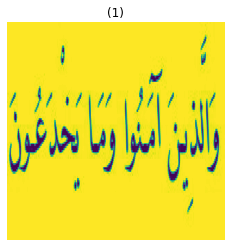

[[[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.6057029e+00]]

 [[ 2.7700000e+02  1.5882496e+00]]

 [[ 2.7500000e+02  1.5882496e+00]]

 [[-2.6600000e+02  3.1066861e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  1.6231562e+00]]

 [[ 2.9000000e+02  1.5358897e+00]]

 [[-4.4500000e+02  3.0892327e+00]]

 [[ 2.8000000e+02  1.5533431e+00]]

 [[-1.8400000e+02  3.1066861e+00]]

 [[ 2.5400000e+02  1.6406095e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[ 4.6500000e+02  1.7453292e-02]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5184364e+00]]

 [[ 2.6800000e+02  1.6231562e+00]]

 [[ 2.8200000e+02  1.5184364e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.5000000e+02  1.6580628e+00]]

 [[-4.5300000e+02  3.1066861e+00]]

 [[-4.4900000e+02  3.1066861e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 2.5800000e+02  1.6406095

In [318]:
show_images([X_test[0]])
print("hehhhhh",get_max_vote(X_test[0]))
print("saaaa7",y_test[0])

In [319]:
test_values=[get_max_vote(img) for img in X_test]
print(test_values)
print(y_test.astype("int"))
correct=test_values==y_test
print(y_test[test_values!=y_test])
print("accuracy=",np.sum(correct)/correct.shape[0])

[[[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.6057029e+00]]

 [[ 2.7700000e+02  1.5882496e+00]]

 [[ 2.7500000e+02  1.5882496e+00]]

 [[-2.6600000e+02  3.1066861e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  1.6231562e+00]]

 [[ 2.9000000e+02  1.5358897e+00]]

 [[-4.4500000e+02  3.0892327e+00]]

 [[ 2.8000000e+02  1.5533431e+00]]

 [[-1.8400000e+02  3.1066861e+00]]

 [[ 2.5400000e+02  1.6406095e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[ 4.6500000e+02  1.7453292e-02]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5184364e+00]]

 [[ 2.6800000e+02  1.6231562e+00]]

 [[ 2.8200000e+02  1.5184364e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.5000000e+02  1.6580628e+00]]

 [[-4.5300000e+02  3.1066861e+00]]

 [[-4.4900000e+02  3.1066861e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 2.5800000e+02  1.6406095

[245235    260    257      0    135   3461      0    262    255    135]
[3.]
[8]
[[[ 4.1200000e+02  6.9813170e-02]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  1.7453292e-02]]

 [[ 4.0300000e+02  3.4906585e-02]]

 [[ 1.1600000e+02  1.7453292e-02]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.7500000e+02  3.6651915e-01]]

 [[ 2.9400000e+02  1.6231562e+00]]

 [[ 2.9800000e+02  1.6231562e+00]]

 [[ 2.9600000e+02  1.3962634e-01]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 4.7000000e+02  1.7453292e-02]]

 [[ 1.4500000e+02  3.4906585e-02]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 1.9300000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  1.5882496e+00]]

 [[ 1.1300000e+02  1.7453292e-02]]

 [[ 1.9000000e+01  3.4906585e-02]]

 [[ 2.9900000e+02  1.6057029e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  5.2359879e-02]]

 [[ 2.9200000e+02  1.2217305e-01]]

 [[ 4.1600000e+02  8.7266460e-02]]

 [[-3.9100000e+02  3.1241393e+00]]

 [[ 1.6300000e+02  

[243941    870    760      0    180   2439      0    873    760    177]
[3.]
[7]
[[[ 9.9000000e+01  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[-9.0000000e+01  3.1066861e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[-9.3000000e+01  3.1066861e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[-9.5000000e+01  3.1241393e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 1.7100000e+02  0.0000000e+00]]

 [[ 1.0100000e+02  1.7453292e-02]]

 [[ 3.7800000e+02  5.2359879e-02]]

 [[ 9.4000000e+01  3.4906585e-02]]

 [[ 2.1600000e+02  2.6179940e-01]]

 [[ 3.7700000e+02  3.4906585e-02]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 1.0300000e+02  8.7266460e-02]]

 [[ 2.7000000e+02  

 [[-2.3000000e+02  3.1241393e+00]]]
[4.]
[240635    389   1164      0    163   6009      0    378   1122    140]
[3.]
[0.]
[244859    506    491      0    151   2842      0    510    492    149]
[3.]
[4]
[[[-243.           3.0892327]]

 [[-282.           3.0717795]]

 [[-455.           3.1241393]]

 ...

 [[-125.           3.0892327]]

 [[-449.           3.1241393]]

 [[-203.           3.1241393]]]
[7.]
[236360    804   1329      0    311   8760      0    756   1391    289]
[4.]
[0.]
[241828    766    826      0    264   4461      0    778    811    266]
[4.]
[7]
[[[ 8.1000000e+01  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.0300000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[ 1.2900000e+02  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 3.3900000e+02  1.5707964e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

[243087    187   1193      0    120   3913      0    115   1307     78]
[1.]
[6.]
[246021    286    540      0    264   1799      0    279    548    263]
[1.]
[0]
[[[ 4.8000000e+02  1.5707964e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 2.5000000e+01  1.5707964e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 1.3400000e+02  1.5707964e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[ 4.5400000e+02  1.5707964e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 1.6000000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 5.2000000e+01  1.5707964e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  1.5707964e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  1.5707964e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.2800000e+02  1.5707964e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 7.800

[244451    528    564      0    311   2743      0    526    568    309]
[3.]
[4]
[[[ 4.3400000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 2.6000000e+01  0.0000000e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 3.5000000e+01  1.5707964e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 1.0600000e+02  1.5707964e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 1.2700000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.9200000e+02  1.5707964e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  1.5707964e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 1.7800000e+02  1.5707964e+00]]

 [[ 1.4200000e+02  

[240327    517    774      0    472   6147      0    513    782    468]
[4.]
[6]
[[[ 2.8100000e+02  5.9341192e-01]]

 [[ 2.3400000e+02  2.7925268e-01]]

 [[ 2.7500000e+02  5.4105204e-01]]

 [[ 2.1700000e+02  1.9198622e-01]]

 [[ 4.4100000e+02  7.8539819e-01]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  6.1086524e-01]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  5.5850536e-01]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  5.0614548e-01]]

 [[ 2.7300000e+02  5.0614548e-01]]

 [[ 2.7900000e+02  5.5850536e-01]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[-9.6000000e+01  3.0717795e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  5.2359879e-02]]

 [[ 4.1200000e+02  1.0821041e+00]]

 [[-1.0800000e+02  3.0892327e+00]]

 [[ 3.8800000e+02  1.2391838e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.0600000e+02  0.0000000e+00]]

 [[ 2.5400000e+02  

 [[-7.9000000e+01  3.1241393e+00]]]
[0.]
[239876    215    526      0    217   8208      0    214    532    212]
[0.]
[5.]
[245038     71    322      0     72   4032      0     72    318     75]
[0.]
[0]
[[[ 22.          1.5707964]]

 [[338.          0.       ]]

 [[476.          0.       ]]

 [[ 27.          0.       ]]

 [[234.          0.       ]]

 [[470.          1.5707964]]

 [[ 64.          1.5707964]]

 [[227.          1.5707964]]

 [[390.          1.5707964]]

 [[129.          0.       ]]

 [[267.          1.5707964]]

 [[305.          0.       ]]

 [[185.          1.5707964]]

 [[372.          0.       ]]

 [[268.          0.       ]]

 [[430.          1.5707964]]

 [[145.          1.5707964]]

 [[348.          1.5707964]]

 [[442.          0.       ]]

 [[ 61.          0.       ]]

 [[104.          1.5707964]]

 [[ 95.          0.       ]]]
[8.]
[241340     27   2796      0     29   2956      0     27   2798     27]
[8.]
[8.]
[246219     97   1119      0     89   1171      0

[241375    341    909      0    206   5701      0    306    951    211]
[3.]
[5.]
[245070    414    491      0    225   2673      0    419    480    228]
[3.]
[8]
[[[ 292.           1.3439035]]

 [[ 155.           0.       ]]

 [[ 288.           1.3613569]]

 ...

 [[ -36.           2.4260077]]

 [[-256.           2.8274333]]

 [[ -93.           3.0019662]]]
[7.]
[241648    561    944      0    169   5014      0    529   1002    133]
[3.]
[0.]
[245033    581    530      0    163   2420      0    591    523    159]
[3.]
[7]
[[[-416.           3.1241393]]

 [[-399.           3.1241393]]

 [[-470.           3.1241393]]

 ...

 [[-379.           3.0892327]]

 [[-304.           3.106686 ]]

 [[-273.           3.1241393]]]
[7.]
[224419   1324   1926      0   1076  16929      0   1290   2038    998]
[4.]
[4.]
[233301   1290   1679      0    896   8969      0   1292   1667    906]
[4.]
[7]
[[[ 2.9000000e+01  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]

 [[-1.1400000e+02  3.1241393e+00]]]
[8.]
[235816     67   4558      0     59   4816      0     45   4582     57]
[8.]
[8.]
[243559    160   1995      0    147   1837      0    150   2005    147]
[8.]
[8]
[[[-1.0000000e+01  3.1241393e+00]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[-4.3800000e+02  3.1241393e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[-8.0000000e+00  3.1066861e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[-1.3000000e+01  3.1241393e+00]]

 [[ 1.8000000e+01  1.7453292e-02]]

 [[-4.4100000e+02  3.1241393e+00]]

 [[-4.3600000e+02  3.1066861e+00]]

 [[-3.6900000e+02  2.9496064e+00]]

 [[ 1.3000000e+01  0.0000000e+00]]

 [[-5.0000000e+00  3.1066861e+00]]

 [[ 4.4800000e+02  1.7453292e-02]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 2.7000000e+01  5.2359879e-02]]

 [[-1.7300000e+02  3.1066861e+00]]

 [[ 4.5200000e+02  3.4906585e-02]]

 [[ 4.5300000e+02  1.7453292e-02]]

 [[ 2.9500000e+02  1.2217305e-01]]

 [[-1.0000000e+00  3.0019662e+00]]

 [[-

[235243   1119   1490      0    742   8075      0   1116   1472    743]
[4.]
[7]
[[[ 3.8200000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[-1.1200000e+02  3.1066861e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[-4.0200000e+02  3.1241393e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[-3.7300000e+02  3.1066861e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[-1.1700000e+02  3.1241393e+00]]

 [[-3.6300000e+02  3.1066861e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  7.8539819e-01]]

 [[-1.0700000e+02  3.0892327e+00]]

 [[-4.0000000e+02  3.1241393e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  1.3788100e+00]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 7.9000000e+01  1.0471976e-01]]

 [[ 3.2200000e+02  7.8539819e-01]]

 [[ 2.3400000e+02  0.0000000e+00]]

 [[-3.6800000e+02  

[247235    183    584      0    166    899      0    183    588    162]
[1.]
[0]
[[[ 3.1200000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  1.5533431e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1500000e+02  1.5533431e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  1.5009831e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  7.8539819e-01]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  1.5882496e+00]]

 [[ 2.2100000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5533431e+00]]

 [[ 2.9600000e+02  1.6057029e+00]]

 [[ 3.4500000e+02  1.4835298e+00]]

 [[ 3.1100000e+02  1.5882496e+00]]

 [[ 3.4700000e+02  1.4835298e+00]]

 [[ 3.4200000e+02  1.5009831e+00]]

 [[ 3.0900000e+02  

 [[-1.2900000e+02  3.1241393e+00]]]
[7.]
[235299    887   1570      0    347   9125      0    854   1594    324]
[4.]
[0.]
[241220    849    953      0    298   4578      0    848    953    301]
[4.]
[7]
[[[ 2.7500000e+02  1.5707964e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  1.5882496e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.6057029e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 2.3500000e+02  1.5707964e+00]]

 [[ 

 [[-4.0200000e+02  3.1241393e+00]]]
[7.]
[231828   1363   2009      0   1000   9428      0   1345   2036    991]
[4.]
[2.]
[238960   1237   1283      0    680   4640      0   1232   1289    679]
[4.]
[7]
[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  1.5707964e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  1.5707964e+00]]

 [[ 1.2900000e+02  1.5707964e+00]]

 [[ 8.7000000e+01  1.5707964e+00]]

 [[ 3.3000000e+01  1.5707964e+00]]

 [[ 2.2600000e+02  1.5707964e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  1.5707964e+00]]

 [[ 3.7700000e+02  1.5707964e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 2.3000000e+01  1.7453292e-02]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 

[243859    573    661      0    318   3037      0    576    655    321]
[3.]
[0]
[[[ 1.3400000e+02  0.0000000e+00]]

 [[ 1.3700000e+02  6.9813170e-02]]

 [[ 1.4100000e+02  8.7266460e-02]]

 ...

 [[-2.0900000e+02  3.0717795e+00]]

 [[-1.7200000e+02  3.1241393e+00]]

 [[-1.0000000e+02  3.1241393e+00]]]
[7.]
[231528   1241   1011      0    380  13216      0   1172   1065    387]
[4.]
[0.]
[236670    827   1250      0    297   8578      0    830   1258    290]
[4.]
[7]
[[[ 2.4000000e+01  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.1800000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  7.8539819e-01]]

 [[-4.3900000e+02  3.0892327e+00]]

 [[ 4.2600000e+02  7.8539819e-01]]

 [[ 2.9300000e+02  1.5707

[244896    598    513      0    174   2534      0    604    500    181]
[3.]
[6]
[[[ 1.4000000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  5.2359879e-02]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 8.6000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.2300000e+02  2.2689280e-01]]

 [[ 1.2400000e+02  2.4434610e-01]]

 [[ 2.4500000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.1900000e+02  2.2689280e-01]]

 [[ 1.4600000e+02  1.7453292e-02]]

 [[ 8.0000000e+01  3.4906585e-02]]

 [[ 1.1800000e+02  2.0943952e-01]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 2.3100000e+02  1.5707964e+00]]

 [[ 9.2000000e+01  1.7453292e-02]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  1.7453292e-02]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 2.0800000e+02  1.7453292e-02]]

 [[ 3.0500000e+02  

[240850    555    789      0    293   5882      0    552    779    300]
[4.]
[7]
[[[249.          1.5707964]]

 [[234.          1.5707964]]

 [[241.          1.5707964]]

 [[226.          1.5707964]]

 [[302.          1.5707964]]

 [[116.          0.       ]]

 [[113.          0.       ]]

 [[120.          0.       ]]

 [[294.          1.5707964]]

 [[287.          1.5707964]]

 [[ 94.          0.       ]]

 [[ 90.          0.       ]]

 [[ 86.          0.       ]]

 [[ 63.          0.       ]]

 [[211.          1.5707964]]

 [[ 67.          0.       ]]

 [[219.          1.5707964]]

 [[ 60.          0.       ]]

 [[ 97.          0.       ]]

 [[243.          1.5358897]]

 [[250.          1.553343 ]]

 [[240.          1.5882496]]

 [[ 56.          0.       ]]

 [[235.          1.553343 ]]

 [[196.          1.5707964]]

 [[204.          1.5707964]]

 [[242.          1.553343 ]]

 [[232.          1.6057029]]

 [[239.          1.6057029]]

 [[253.          1.4835298]]

 [[230.          1.

[241641    622    753      0    406   4795      0    621    755    407]
[4.]
[7]
[[[332.          1.5707964]]

 [[479.          1.5707964]]

 [[429.          1.5707964]]

 [[158.          1.5707964]]

 [[449.          1.5707964]]

 [[478.          0.       ]]

 [[ 12.          1.5707964]]

 [[ 20.          0.       ]]

 [[ 62.          1.5707964]]

 [[139.          1.5707964]]

 [[351.          1.5707964]]

 [[ 42.          1.5707964]]

 [[188.          1.5707964]]

 [[297.          0.       ]]

 [[ 91.          1.5707964]]

 [[109.          1.5707964]]

 [[339.          0.       ]]

 [[269.          0.       ]]

 [[436.          0.       ]]

 [[ 62.          0.       ]]

 [[235.          1.5707964]]

 [[206.          1.5707964]]

 [[256.          1.5707964]]

 [[365.          0.       ]]

 [[201.          0.       ]]

 [[302.          1.5707964]]

 [[130.          0.       ]]

 [[159.          0.       ]]

 [[407.          0.       ]]

 [[227.          0.       ]]

 [[ 88.          0.

 [[-3.5800000e+02  3.1241393e+00]]]
[0.]
[242952    361   1017      0    128   4036      0    347   1051    108]
[1.]
[5.]
[246109    495    450      0    181   1639      0    499    438    189]
[1.]
[0]
[[[ 3.2600000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5358897e+00]]

 [[ 3.3000000e+02  1.5533431e+00]]

 [[ 3.2700000e+02  1.5533431e+00]]

 [[ 3.1600000e+02  1.5882496e+00]]

 [[ 2.8400000e+02  3.6651915e-01]]

 [[ 3.0300000e+02  1.5358897e+00]]

 [[ 2.8500000e+02  1.5882496e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5882496e+00]]

 [[ 3.1800000e+02  1.5882496e+00]]

 [[ 

 [[-3.4300000e+02  3.1241393e+00]]]
[6.]
[233834     53   1494      0     51  12970      0     45   1522     31]
[4.]
[8.]
[243206    302    148      0    224   5446      0    311    134    229]
[4.]
[6]
[[[ 302.           1.5707964]]

 [[ 472.           0.       ]]

 [[ 297.           1.5707964]]

 [[ 477.           0.       ]]

 [[ 368.           0.       ]]

 [[ 303.           1.553343 ]]

 [[-458.           3.0892327]]

 [[ 316.           1.5707964]]

 [[  19.           0.       ]]

 [[  86.           0.       ]]

 [[ 283.           1.5707964]]

 [[ 296.           1.5882496]]

 [[ 314.           1.5358897]]

 [[ 450.           0.7853982]]

 [[ 291.           1.5882496]]

 [[ 286.           1.6057029]]

 [[ 448.           0.7853982]]

 [[ 279.           1.6231562]]

 [[ 301.           1.5009831]]

 [[-369.           3.0892327]]

 [[ 447.           0.7330383]]

 [[-453.           3.0717795]]

 [[  81.           0.       ]]

 [[ 365.           0.       ]]

 [[ 333.           1.4486233

 [[249.          1.5707964]]]
[4.]
[244621    202   1065      0    135   2575      0    172   1093    137]
[1.]
[1.]
[247126    329    383      0    195   1060      0    325    391    191]
[1.]
[4]
[[[ 4.6100000e+02  0.0000000e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 4.0900000e+02  1.5707964e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  1.5707964e+00]]

 [[ 3.8000000e+02  1.5707964e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  1.5707964e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 4.1600000e+02  1.5533431e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[ 4.0400000e+02  1.5882496e+00]]

 [[ 3.8400000e+02  1.5533431e+00]]

 [[-4.3400000e+02  3.1241393e+00]]

 [[ 3.8400

[246771    204    471      0    195   1489      0    202    471    197]
[1.]
[8]
[[[ 3.1200000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 1.0300000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  1.5882496e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5882496e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  

 [[304.          1.6231562]]]
[4.]
[245454    571    722      0    205   1550      0    579    698    221]
[1.]
[0.]
[247202    380    443      0    164    824      0    378    439    170]
[1.]
[4]
[[[ 2.3400000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  1.7453292e-02]]

 [[ 1.7800000e+02  3.4906585e-02]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[ 2.3500000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  1.7453292e-02]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  3.4906585e-02]]

 [[ 2.2200000e+02  1.5707964e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 2.2800000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 1.7100000e+02  1.7453292e-02]]

 [[ 3.7000

 [[-3.6600000e+02  3.1066861e+00]]]
[6.]
[226360    814   3227      0    641  14276      0    797   3273    612]
[4.]
[4.]
[237727   1136   1305      0    732   5927      0   1130   1308    735]
[4.]
[6]
[[[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 2.0700000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  0.0000000e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 

 [[-2.3100000e+02  2.9146998e+00]]]
[6.]
[230057    750   2351      0    591  12559      0    748   2379    565]
[4.]
[4.]
[239104   1033   1058      0    617   5480      0   1045   1038    625]
[4.]
[6]
[[[ 3.6900000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-3.6300000e+02  3.1241393e+00]]

 [[ 3.7700000e+02  4.3633232e-01]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[-1.7800000e+02  3.0892327e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[-6.4000000e+01  3.1066861e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 3.6300000e+02  1.9198622e-01]]

 [[ 2.9900000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  2.2689280e-01]]

 [[ 3.2000000e+02  1.5184364e+00]]

 [[-1.7500000e+02  3.0717795e+00]]

 [[ 

 [[  -4.           3.1241393]]]
[7.]
[227848    846   2397      0    755  13978      0    839   2505    832]
[4.]
[5.]
[236170    965   1600      0    787   7119      0    962   1603    794]
[4.]
[7]
[[[ 284.           0.       ]]

 [[ 354.           0.       ]]

 [[ 107.           0.       ]]

 ...

 [[-113.           3.0892327]]

 [[ -46.           3.0892327]]

 [[  -3.           3.106686 ]]]
[7.]
[231632    563    974      0    409  14474      0    589    986    373]
[4.]
[4.]
[239122    513    728      0    368   7661      0    514    719    375]
[4.]
[7]
[[[ 129.           0.       ]]

 [[ 343.           0.       ]]

 [[ 213.           0.       ]]

 ...

 [[-232.           3.0892327]]

 [[ -36.           3.0892327]]

 [[-200.           3.1241393]]]
[0.]
[247625     50    613      0     53    943      0     50    611     55]
[1.]
[1.]
[249345     16    114      0     47    301      0     16    114     47]
[1.]
[0]
[[[ 1.3300000e+02  1.2217305e-01]]

 [[ 1.3800000e+02  1.3962634e-01

 [[-2.6900000e+02  3.1241393e+00]]]
[0.]
[242830    452    536      0    172   4850      0    438    572    150]
[3.]
[2.]
[245481    364    454      0    161   2561      0    365    452    162]
[3.]
[0]
[[[ 3.8100000e+02  1.5707964e+00]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  1.7453292e-01]]

 [[-4.2600000e+02  3.1241393e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 4.8800000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  1.5882496e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  1.5533431e+00]]

 [[ 3.3500000e+02  1.5882496e+00]]

 [[ 

 [[-1.6500000e+02  3.1241393e+00]]]
[7.]
[230951   1269   1037      0    912  12737      0   1279    990    825]
[4.]
[4.]
[237713    981   1311      0    612   6483      0    994   1284    622]
[4.]
[7]
[[[3.5300000e+02 1.5707964e+00]]

 [[3.5000000e+02 1.5707964e+00]]

 [[1.7900000e+02 1.9547688e+00]]

 [[3.3800000e+02 1.5707964e+00]]

 [[3.5500000e+02 1.5533431e+00]]

 [[1.9200000e+02 1.9024088e+00]]

 [[1.3000000e+02 2.0420351e+00]]

 [[3.3400000e+02 1.5707964e+00]]

 [[3.4400000e+02 1.5707964e+00]]

 [[1.2300000e+02 2.0594885e+00]]

 [[3.3000000e+02 1.6580628e+00]]

 [[1.9400000e+02 1.9024088e+00]]

 [[1.8600000e+02 1.9373155e+00]]

 [[1.8800000e+02 1.9373155e+00]]

 [[1.1800000e+02 2.0594885e+00]]

 [[2.5400000e+02 1.5707964e+00]]

 [[3.4200000e+02 1.5707964e+00]]

 [[3.4900000e+02 1.5882496e+00]]

 [[1.3700000e+02 2.0594885e+00]]

 [[1.0600000e+02 2.1118484e+00]]

 [[2.0000000e+02 1.8849555e+00]]

 [[1.9000000e+02 1.9198622e+00]]

 [[1.0500000e+02 2.1293018e+00]]

 [[1.7100000e+

[7.]
[226539    599   1645      0    480  18013      0    618   1637    469]
[4.]
[4.]
[236656    686    953      0    452   9162      0    693    941    457]
[4.]
[7]
[[[  94.           0.       ]]

 [[  90.           0.       ]]

 [[ 324.           0.       ]]

 ...

 [[ -63.           3.0892327]]

 [[-296.           3.106686 ]]

 [[-103.           3.1241393]]]
[0.]
[242288    222   1252      0     78   4658      0    232   1230     40]
[3.]
[4.]
[245901    557    425      0    153   1829      0    561    423    151]
[1.]
[0]
[[[ 179.           0.       ]]

 [[ -80.           3.106686 ]]

 [[ 143.           0.       ]]

 ...

 [[-109.           3.0717795]]

 [[-181.           3.0892327]]

 [[-244.           3.106686 ]]]
[7.]
[223955    925   2797      0    896  16809      0    908   2833    877]
[4.]
[4.]
[235049   1060   1553      0    906   7913      0   1071   1537    911]
[4.]
[7]
[[[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.6700000e+02  1.5707964e+00]]

 [[ 1.2000000e+01  0.0000000

 [[-4.7900000e+02  3.1241393e+00]]]
[7.]
[243679    192   1230      0    168   3133      0    165   1278    155]
[1.]
[5.]
[246615    266    498      0    211   1435      0    262    504    209]
[1.]
[7]
[[[ 3.3900000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.7453292e-02]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 2.0900000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[-3.3700000e+02  3.1241393e+00]]

 [[ 3.4700000e+02  3.4906585e-02]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [[ 

[243321    152    950      0    168   4133      0    141    968    167]
[1.]
[1.]
[246387    232    380      0    247   1893      0    233    382    246]
[1.]
[0]
[[[   2.           0.       ]]

 [[  86.           0.       ]]

 [[ 133.           0.       ]]

 ...

 [[-385.           3.0717795]]

 [[-338.           3.0892327]]

 [[-475.           3.1241393]]]
[7.]
[234818    630   2533      0    407   8034      0    616   2591    371]
[4.]
[7.]
[241846    885    945      0    408   3678      0    873    962    403]
[4.]
[7]
[[[ 4.3700000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.5533431e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[

[245333    341    521      0    311   2321      0    338    519    316]
[3.]
[6]
[[[2.        1.5707964]]]
[8.]
[245642    287    587      0    114   2382      0    288    611     89]
[1.]
[1.]
[247486    290    307      0     95   1130      0    301    293     98]
[1.]
[8]
[[[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  1.5882496e+00]]

 [[ 2.8800000e+02  1.5533431e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 2.7800000e+02  1.5882496e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 2.7400000e+02  1.5882496e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  1.5533431e+00]]

 [[ 2.8200000e+02  1.5533431e+00]]

 [[ 2

 [[-3.1000000e+01  3.1241393e+00]]]
[6.]
[240999    438   1420      0    140   5005      0    419   1428    151]
[3.]
[2.]
[245216    533    582      0    160   2234      0    533    578    164]
[3.]
[6]
[[[ 3.4200000e+02  1.5707964e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5882496e+00]]

 [[ 3.2000000e+02  1.5533431e+00]]

 [[ 3.4000000e+02  1.5184364e+00]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 3.2500000e+02  1.5533431e+00]]

 [[-1.5100000e+02  3.1241393e+00]]

 [[-1.4600000e+02  3.1066861e+00]]

 [[ 3.3300000e+02  1.5358897e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  1.6057029e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 3.4600000e+02  1.4660766e+00]]

 [[ 3.4300000e+02  1.5009831e+00]]

 [[ 

[244751    731    809      0    209   1751      0    737    799    213]
[1.]
[7]
[[[ 1.4600000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 1.5800000e+02  0.0000000e+00]]

 [[ 4.3500000e+02  0.0000000e+00]]

 [[-1.4300000e+02  3.1241393e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[-4.3000000e+02  3.1241393e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  5.4105204e-01]]

 [[ 2.6300000e+02  5.2359879e-01]]

 [[ 2.2200000e+02  0.0000000e+00]]

 [[ 3.6100000e+02  1.5707964e+00]]

 [[ 2.6600000e+02  5.5850536e-01]]

 [[ 2.4700000e+02  5.4105204e-01]]

 [[ 2.4500000e+02  5.4105204e-01]]

 [[ 1.5000000e+02  1.7453292e-02]]

 [[ 3.6200000e+02  1.5358897e+00]]

 [[-4.2500000e+02  3.1066861e+00]]]
[6.]
[244068    275   1136      0     93   2924      0    273   1156     75]
[1.]
[5.]
[246564    460    442      0    129   1374      0    465    434    132]
[1.]
[6]
[[[ 4.4000000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 8.0000000e+00  0.0000000e+0

[242090    934   1136      0    631   2508      0    939   1124    638]
[8.]
[8]
[[[ 8.4000000e+01  0.0000000e+00]]

 [[ 3.3000000e+01  3.4906585e-02]]

 [[ 8.1000000e+01  0.0000000e+00]]

 ...

 [[-4.4500000e+02  3.0892327e+00]]

 [[-4.3000000e+02  3.0892327e+00]]

 [[-3.2700000e+02  3.1066861e+00]]]
[7.]
[236556    800   1392      0    374   8312      0    754   1426    386]
[4.]
[0.]
[241587    708    924      0    267   4615      0    713    915    271]
[4.]
[7]
[[[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  1.7453292e-02]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  5.2359879e-02]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 1.4600000e+02  3.4906585e-02]]

 [[ 4.2500000e+02  3.4906585e-02]]

 [[ 2.5000000e+02  4.3633232e-01]]

 [[ 3.9500000e+02  7.8539819e-01]]

 [[ 1.3400000e+02  3.3161256e-01]]

 [[ 4.4200000e+02  1.0471976e-01]]

 [[ 2.5700000e+02  4.5378560e-01]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  2.2689280e-01]]

 [[ 1.2900000e+02  3.3161

 [[-3.1300000e+02  3.1066861e+00]]]
[6.]
[241570    324    927      0    229   5456      0    301    975    218]
[3.]
[2.]
[245348    387    453      0    227   2512      0    394    449    230]
[3.]
[6]
[[[ 2.2700000e+02  0.0000000e+00]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  1.5707964e+00]]

 [[ 4.1700000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 4.0900000e+02  1.5882496e+00]]

 [[ 3.8900000e+02  1.5533431e+00]]

 [[-2.2500000e+02  3.1241393e+00]]

 [[ 2.3400000e+02  1.7453292e-02]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  1.5533431e+00]]

 [[ 3.8600000e+02  1.5533431e+00]]

 [[ 

[245191     77   1616      0     81   1261      0     79   1614     81]
[8.]
[8]
[[[  49.           0.       ]]

 [[ 491.           0.       ]]

 [[ 489.           0.       ]]

 ...

 [[ -18.           3.106686 ]]

 [[-353.           3.1241393]]

 [[ -57.           3.1241393]]]
[7.]
[233909    637   2074      0    405   9873      0    625   2100    377]
[4.]
[7.]
[241086    902    899      0    387   4540      0    916    873    397]
[4.]
[7]
[[[-1.5800000e+02  3.0892327e+00]]

 [[-2.6200000e+02  3.0892327e+00]]

 [[-1.8300000e+02  3.0892327e+00]]

 [[-2.5800000e+02  3.0717795e+00]]

 [[-7.5000000e+01  3.1066861e+00]]

 [[-3.8000000e+02  3.1066861e+00]]

 [[-1.6200000e+02  3.0892327e+00]]

 [[-7.1000000e+01  3.0892327e+00]]

 [[ 2.4300000e+02  1.7453292e-02]]

 [[-1.8700000e+02  3.0892327e+00]]

 [[-8.0000000e+01  3.1066861e+00]]

 [[-7.6000000e+01  3.0892327e+00]]

 [[-1.7800000e+02  3.0717795e+00]]

 [[ 3.1800000e+02  6.4577180e-01]]

 [[-2.7400000e+02  3.0194197e+00]]

 [[ 1.7200000

[245524    201    722      0    262   2106      0    191    738    256]
[1.]
[8]
[[[ 2.6600000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  1.5707964e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[ 1.2900000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5533431e+00]]

 [[ 3.7000000e+02  1.5882496e+00]]

 [[ 3.8300000e+02  1.5533431e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5707964e+00]]

 [[-2.5500000e+02  3.1241393e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 3.5300000e+02  1.5533431e+00]]

 [[ 3.8600000e+02  1.5358897e+00]]

 [[-4.2000000e+01  

[240959    364    964      0    266   5845      0    324   1036    242]
[3.]
[1.]
[244714    404    548      0    253   2876      0    415    534    256]
[3.]
[4]
[[[-2.5500000e+02  3.0892327e+00]]

 [[-2.6900000e+02  3.1241393e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-4.5200000e+02  3.1241393e+00]]

 [[-4.5600000e+02  3.1241393e+00]]

 [[-2.4200000e+02  3.0543261e+00]]

 [[-5.6000000e+01  3.1066861e+00]]

 [[-4.0800000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[-2.2900000e+02  3.0194197e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[-2.4900000e+02  3.0717795e+00]]

 [[-1.7100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[-3.1500000e+02  3.1241393e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.7453292e-02]]

 [[ 4.600

[3.]
[245941    310    451      0    281   1975      0    311    447    284]
[1.]
[8]
[[[480.          1.5707964]]

 [[484.          0.       ]]

 [[458.          0.       ]]

 [[160.          0.       ]]

 [[186.          0.       ]]

 [[454.          1.5707964]]

 [[210.          0.       ]]

 [[183.          1.5707964]]

 [[330.          1.5707964]]

 [[136.          0.       ]]

 [[356.          1.5707964]]

 [[ 12.          0.       ]]

 [[ 10.          1.5707964]]

 [[ 34.          1.5707964]]

 [[434.          0.       ]]

 [[430.          1.5707964]]

 [[380.          1.5707964]]

 [[234.          0.       ]]

 [[404.          1.5707964]]

 [[207.          1.5707964]]

 [[ 36.          0.       ]]

 [[110.          0.       ]]

 [[334.          0.       ]]

 [[306.          1.5707964]]

 [[157.          1.5707964]]

 [[107.          1.5707964]]

 [[260.          0.       ]]

 [[280.          1.5707964]]

 [[ 57.          1.5707964]]

 [[257.          1.5707964]]

 [[360.       

[231282   1784   2216      0   1354   8010      0   1774   2220   1360]
[4.]
[0]
[4, 0, 8, 4, 6, 8, 6, 7, 6, 8, 6, 7, 4, 4, 4, 7, 0, 8, 7, 4, 8, 8, 7, 7, 8, 6, 6, 6, 4, 0, 8, 6, 7, 8, 7, 7, 0, 8, 7, 6, 0, 6, 7, 0, 7, 7, 8, 4, 0, 6, 7, 8, 6, 8, 8, 7, 0, 7, 6, 8, 7, 0, 7, 6, 6, 0, 7, 4, 4, 7, 4, 7, 8, 7, 8, 0, 6, 6, 8, 7, 6, 6, 8, 6, 4, 7, 4, 8, 4, 7, 7, 4, 8, 4, 7, 4, 4, 6, 8, 7, 6, 6, 6, 4, 7, 7, 0, 0, 7, 8, 7, 6, 0, 4, 7, 7, 7, 0, 7, 8, 8, 7, 0, 0, 7, 4, 8, 7, 7, 6, 8, 6, 7, 7, 7, 0, 6, 6, 7, 6, 8, 8, 8, 7, 0, 6, 8, 7, 4, 8, 7, 7, 6, 6, 7, 7, 4, 8, 6, 8, 6, 7, 4, 4, 7, 8, 8, 7, 0]
[1 3 8 2 5 6 5 2 2 5 5 7 5 1 2 0 6 8 4 7 8 8 4 3 8 1 3 8 3 5 8 5 5 1 2 4 2
 8 4 3 6 1 7 2 5 0 1 5 7 1 4 8 3 8 3 4 0 0 1 3 7 7 7 3 3 2 0 5 6 0 5 0 8 4
 5 3 6 4 3 0 8 1 3 3 1 7 1 6 1 0 7 6 5 1 3 3 2 5 3 3 4 4 4 3 7 0 7 0 0 3 7
 1 2 6 4 2 4 3 4 8 8 5 2 5 7 3 3 2 0 6 3 1 7 7 2 3 2 1 2 3 8 8 4 0 2 1 6 7
 6 8 7 4 1 1 7 0 2 8 6 8 1 7 1 5 0 6 8 0 4]
[1. 3. 2. 5. 6. 5. 2. 2. 5. 5. 5. 1. 2. 0. 6. 4. 7. 4. 3. 1. 3. 8. 